# Netflix Shows and Movies: An Exploratory Analysis
The dataset contains meta information on films and television shows, such as their title, director, and cast. Details such as release year, rating, duration, and so forth. As the first stage, let's load the dataset and add some new features. The goal is to study this dataset to identify the best insights and findings.

In [842]:
import pandas as pd
import numpy as np

import plotly.graph_objects as go
from plotly.offline import init_notebook_mode, iplot

import matplotlib.pyplot as plt
import seaborn as sns

from datetime import datetime

import plotly.express as px

from matplotlib.patches import Patch

from matplotlib.colors import LinearSegmentedColormap


In [843]:
df = pd.read_csv('/kaggle/input/netflix-titles-nov-2019/netflix_titles_nov_2019.csv')

df.head()

,show_id,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,type
0,81193313,Chocolate,NaN,"Ha Ji-won, Yoon Kye-sang, Jang Seung-jo, Kang ...",South Korea,"November 30, 2019",2019,TV-14,1 Season,"International TV Shows, Korean TV Shows, Roman...",Brought together by meaningful meals in the pa...,TV Show
1,81197050,Guatemala: Heart of the Mayan World,"Luis Ara, Ignacio Jaunsolo",Christian Morales,NaN,"November 30, 2019",2019,TV-G,67 min,"Documentaries, International Movies","From Sierra de las Minas to Esquipulas, explor...",Movie
2,81213894,The Zoya Factor,Abhishek Sharma,"Sonam Kapoor, Dulquer Salmaan, Sanjay Kapoor, ...",India,"November 30, 2019",2019,TV-14,135 min,"Comedies, Dramas, International Movies",A goofy copywriter unwittingly convinces the I...,Movie
3,81082007,Atlantics,Mati Diop,"Mama Sane, Amadou Mbow, Ibrahima Traore, Nicol...","France, Senegal, Belgium","November 29, 2019",2019,TV-14,106 min,"Dramas, Independent Movies, International Movies","Arranged to marry a rich man, young Ada is cru...",Movie
4,80213643,Chip and Potato,NaN,"Abigail Oliver, Andrea Libman, Briana Buckmast...","Canada, United Kingdom",NaN,2019,TV-Y,2 Seasons,Kids' TV,"Lovable pug Chip starts kindergarten, makes ne...",TV Show


### Understanding data

In [844]:
df.shape

(5837, 12)

In [845]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5837 entries, 0 to 5836
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       5837 non-null   int64 
 1   title         5837 non-null   object
 2   director      3936 non-null   object
 3   cast          5281 non-null   object
 4   country       5410 non-null   object
 5   date_added    5195 non-null   object
 6   release_year  5837 non-null   int64 
 7   rating        5827 non-null   object
 8   duration      5837 non-null   object
 9   listed_in     5837 non-null   object
 10  description   5837 non-null   object
 11  type          5837 non-null   object
dtypes: int64(2), object(10)
memory usage: 547.3+ KB


In [846]:
df.columns

Index(['show_id', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description',
       'type'],
      dtype='object')

In [847]:
df.describe()

,show_id,release_year
count,5.837000e+03,5837.000000
mean,7.730079e+07,2013.688539
std,9.479777e+06,8.419088
min,2.698800e+05,1925.000000
25%,8.004520e+07,2013.000000
50%,8.016353e+07,2016.000000
75%,8.024188e+07,2018.000000
max,8.122720e+07,2020.000000


### Cleaning data

In [848]:
# Calculate the percentage of missing values in each column
# ** Print out the column name along with its null rate, if the null rate is greater than 0. 

for i in df.columns:
    null_rate = df[i].isna().sum() / len(df) * 100 
    if null_rate > 0 :
        print("{} null rate: {}%".format(i,round(null_rate,2)))

director null rate: 32.57%
cast null rate: 9.53%
country null rate: 7.32%
date_added null rate: 11.0%
rating null rate: 0.17%


In [849]:
# Fill missing values in the director column with 'Unknown'

df['director'] = df['director'].fillna('Unknown')

In [850]:
# Fill missing values in the cast column with 'Unknown'

df['cast'] = df['cast'].fillna('Unknown')

In [851]:
# Iterate over each row, checks if the 'country' is missing and 'cast' is not missing
# Look for the most common country among the cast members and updates the 'country' accordingly. 
# If no country is found for the cast members, continue to the next row. 
# Fill any remaining missing 'country' values with 'Unknown'.

df['country'].fillna('Unknown', inplace=True)

cast_country_mapping = {}

for index, row in df.iterrows():
    cast = row['cast']
    country = row['country']
        
    if country != 'Unknown' or pd.isna(cast):
        continue
        
    cast_list = cast.split(', ')
        
    for actor in cast_list:
        
        if actor in cast_country_mapping:
            continue
                
        actor_rows = df[df['cast'].str.contains(actor, na=False)]
                
        actor_rows_with_country = actor_rows[actor_rows['country'] != 'Unknown']
                
        country_counts = actor_rows_with_country['country'].value_counts()
                
        if len(country_counts) == 0:
            continue
                
        most_common_country = country_counts.idxmax()
                
        cast_country_mapping[actor] = most_common_country

for index, row in df.iterrows():
    cast = row['cast']
    country = row['country']
    
    if country == 'Unknown' and not pd.isna(cast):
        cast_list = cast.split(', ')
        
        common_countries = [cast_country_mapping.get(actor, 'Unknown') for actor in cast_list]
        
        common_countries = [c for c in common_countries if c != 'Unknown']
        if common_countries:
            
            df.at[index, 'country'] = max(set(common_countries), key=common_countries.count)

df['country'].fillna('Unknown', inplace=True)


/tmp/ipykernel_33/1012463331.py:6: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.



/tmp/ipykernel_33/1012463331.py:51: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df

In [852]:
# Drop missing values from the 'date_added' and 'rating' columns

df.dropna(subset=['date_added', 'rating'], inplace=True)

In [853]:
df

,show_id,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,type
0,81193313,Chocolate,Unknown,"Ha Ji-won, Yoon Kye-sang, Jang Seung-jo, Kang ...",South Korea,"November 30, 2019",2019,TV-14,1 Season,"International TV Shows, Korean TV Shows, Roman...",Brought together by meaningful meals in the pa...,TV Show
1,81197050,Guatemala: Heart of the Mayan World,"Luis Ara, Ignacio Jaunsolo",Christian Morales,Unknown,"November 30, 2019",2019,TV-G,67 min,"Documentaries, International Movies","From Sierra de las Minas to Esquipulas, explor...",Movie
2,81213894,The Zoya Factor,Abhishek Sharma,"Sonam Kapoor, Dulquer Salmaan, Sanjay Kapoor, ...",India,"November 30, 2019",2019,TV-14,135 min,"Comedies, Dramas, International Movies",A goofy copywriter unwittingly convinces the I...,Movie
3,81082007,Atlantics,Mati Diop,"Mama Sane, Amadou Mbow, Ibrahima Traore, Nicol...","France, Senegal, Belgium","November 29, 2019",2019,TV-14,106 min,"Dramas, Independent Movies, International Movies","Arranged to marry a rich man, young Ada is cru...",Movie
5,81172754,Crazy people,Moses Inwang,"Ramsey Nouah, Chigul, Sola Sobowale, Ireti Doy...",Nigeria,"November 29, 2019",2018,TV-14,107 min,"Comedies, International Movies, Thrillers",Nollywood star Ramsey Nouah learns that someon...,Movie
...,...,...,...,...,...,...,...,...,...,...,...,...
5832,70141644,Mad Ron's Prevues from Hell,Jim Monaco,"Nick Pawlow, Jordu Schell, Jay Kushwara, Micha...",United States,"November 1, 2010",1987,NR,84 min,"Cult Movies, Horror Movies","This collection cherry-picks trailers, forgott...",Movie
5833,70127998,Splatter,Joe Dante,"Corey Feldman, Tony Todd, Tara Leigh, Erin Way...",United States,"November 18, 2009",2009,TV-14,29 min,Horror Movies,"After committing suicide, a washed-up rocker r...",Movie
5834,70084180,Just Another Love Story,Ole Bornedal,"Anders W. Berthelsen, Rebecka Hemse, Nikolaj L...",Denmark,"May 5, 2009",2007,NR,104 min,"Dramas, International Movies",When he causes a car accident that leaves a yo...,Movie
5835,70157452,Dinner for Five,Unknown,Unknown,United States,"February 4, 2008",2007,TV-MA,1 Season,Stand-Up Comedy & Talk Shows,"In each episode, four celebrities join host Jo...",TV Show


In [854]:
# convert the 'date_added' column to datetime format. 
# Extract the day, month, and year components from the 'date_added' column into new columns 'day_added', 'month_added', and 'year_added'.
# Drop the 'date_added' column

df['date_added'] = pd.to_datetime(df['date_added'])

df['day_added'] = df['date_added'].dt.day
df['month_added'] = df['date_added'].dt.month
df['year_added'] = df['date_added'].dt.year

df.drop(columns=['date_added'], inplace=True)

In [855]:
df

,show_id,title,director,cast,country,release_year,rating,duration,listed_in,description,type,day_added,month_added,year_added
0,81193313,Chocolate,Unknown,"Ha Ji-won, Yoon Kye-sang, Jang Seung-jo, Kang ...",South Korea,2019,TV-14,1 Season,"International TV Shows, Korean TV Shows, Roman...",Brought together by meaningful meals in the pa...,TV Show,30,11,2019
1,81197050,Guatemala: Heart of the Mayan World,"Luis Ara, Ignacio Jaunsolo",Christian Morales,Unknown,2019,TV-G,67 min,"Documentaries, International Movies","From Sierra de las Minas to Esquipulas, explor...",Movie,30,11,2019
2,81213894,The Zoya Factor,Abhishek Sharma,"Sonam Kapoor, Dulquer Salmaan, Sanjay Kapoor, ...",India,2019,TV-14,135 min,"Comedies, Dramas, International Movies",A goofy copywriter unwittingly convinces the I...,Movie,30,11,2019
3,81082007,Atlantics,Mati Diop,"Mama Sane, Amadou Mbow, Ibrahima Traore, Nicol...","France, Senegal, Belgium",2019,TV-14,106 min,"Dramas, Independent Movies, International Movies","Arranged to marry a rich man, young Ada is cru...",Movie,29,11,2019
5,81172754,Crazy people,Moses Inwang,"Ramsey Nouah, Chigul, Sola Sobowale, Ireti Doy...",Nigeria,2018,TV-14,107 min,"Comedies, International Movies, Thrillers",Nollywood star Ramsey Nouah learns that someon...,Movie,29,11,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5832,70141644,Mad Ron's Prevues from Hell,Jim Monaco,"Nick Pawlow, Jordu Schell, Jay Kushwara, Micha...",United States,1987,NR,84 min,"Cult Movies, Horror Movies","This collection cherry-picks trailers, forgott...",Movie,1,11,2010
5833,70127998,Splatter,Joe Dante,"Corey Feldman, Tony Todd, Tara Leigh, Erin Way...",United States,2009,TV-14,29 min,Horror Movies,"After committing suicide, a washed-up rocker r...",Movie,18,11,2009
5834,70084180,Just Another Love Story,Ole Bornedal,"Anders W. Berthelsen, Rebecka Hemse, Nikolaj L...",Denmark,2007,NR,104 min,"Dramas, International Movies",When he causes a car accident that leaves a yo...,Movie,5,5,2009
5835,70157452,Dinner for Five,Unknown,Unknown,United States,2007,TV-MA,1 Season,Stand-Up Comedy & Talk Shows,"In each episode, four celebrities join host Jo...",TV Show,4,2,2008


In [856]:
# Split the 'duration' column into two separate columns: 'season_count', which contains the number of seasons if applicable, and 'duration', which contains the length of the content if it's not in the form of seasons.

df['season_count'] = df.apply(lambda x : x['duration'].split(" ")[0] if "Season" in x['duration'] else "", axis = 1)
df['duration'] = df.apply(lambda x : x['duration'].split(" ")[0] if "Season" not in x['duration'] else "", axis = 1)


In [857]:
# Clean the duration column

df['duration'] = pd.to_numeric(df['duration'], errors='coerce')

mean_duration = df['duration'].mean()

df['duration'].fillna(mean_duration, inplace=True)

df['duration'] = df['duration'].astype(int)

/tmp/ipykernel_33/3970745484.py:7: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





In [858]:
df

,show_id,title,director,cast,country,release_year,rating,duration,listed_in,description,type,day_added,month_added,year_added,season_count
0,81193313,Chocolate,Unknown,"Ha Ji-won, Yoon Kye-sang, Jang Seung-jo, Kang ...",South Korea,2019,TV-14,98,"International TV Shows, Korean TV Shows, Roman...",Brought together by meaningful meals in the pa...,TV Show,30,11,2019,1
1,81197050,Guatemala: Heart of the Mayan World,"Luis Ara, Ignacio Jaunsolo",Christian Morales,Unknown,2019,TV-G,67,"Documentaries, International Movies","From Sierra de las Minas to Esquipulas, explor...",Movie,30,11,2019,
2,81213894,The Zoya Factor,Abhishek Sharma,"Sonam Kapoor, Dulquer Salmaan, Sanjay Kapoor, ...",India,2019,TV-14,135,"Comedies, Dramas, International Movies",A goofy copywriter unwittingly convinces the I...,Movie,30,11,2019,
3,81082007,Atlantics,Mati Diop,"Mama Sane, Amadou Mbow, Ibrahima Traore, Nicol...","France, Senegal, Belgium",2019,TV-14,106,"Dramas, Independent Movies, International Movies","Arranged to marry a rich man, young Ada is cru...",Movie,29,11,2019,
5,81172754,Crazy people,Moses Inwang,"Ramsey Nouah, Chigul, Sola Sobowale, Ireti Doy...",Nigeria,2018,TV-14,107,"Comedies, International Movies, Thrillers",Nollywood star Ramsey Nouah learns that someon...,Movie,29,11,2019,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5832,70141644,Mad Ron's Prevues from Hell,Jim Monaco,"Nick Pawlow, Jordu Schell, Jay Kushwara, Micha...",United States,1987,NR,84,"Cult Movies, Horror Movies","This collection cherry-picks trailers, forgott...",Movie,1,11,2010,
5833,70127998,Splatter,Joe Dante,"Corey Feldman, Tony Todd, Tara Leigh, Erin Way...",United States,2009,TV-14,29,Horror Movies,"After committing suicide, a washed-up rocker r...",Movie,18,11,2009,
5834,70084180,Just Another Love Story,Ole Bornedal,"Anders W. Berthelsen, Rebecka Hemse, Nikolaj L...",Denmark,2007,NR,104,"Dramas, International Movies",When he causes a car accident that leaves a yo...,Movie,5,5,2009,
5835,70157452,Dinner for Five,Unknown,Unknown,United States,2007,TV-MA,98,Stand-Up Comedy & Talk Shows,"In each episode, four celebrities join host Jo...",TV Show,4,2,2008,1


In [859]:
df.columns

Index(['show_id', 'title', 'director', 'cast', 'country', 'release_year',
       'rating', 'duration', 'listed_in', 'description', 'type', 'day_added',
       'month_added', 'year_added', 'season_count'],
      dtype='object')

### Visualization

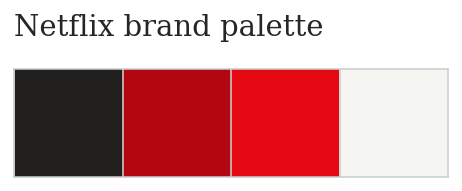

In [860]:
# Use Netflix brand colors, I think it's visually appealing 

sns.palplot(['#221f1f', '#b20710', '#e50914','#f5f5f1'])

plt.title("Netflix brand palette ",loc='left',fontfamily='serif',fontsize=15,y=1.2)
plt.show()

Timeline code from Subin An's notebook https://www.kaggle.com/subinium/awesome-visualization-with-titanic-dataset

/tmp/ipykernel_33/3771031463.py:47: MatplotlibDeprecationWarning:

The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.



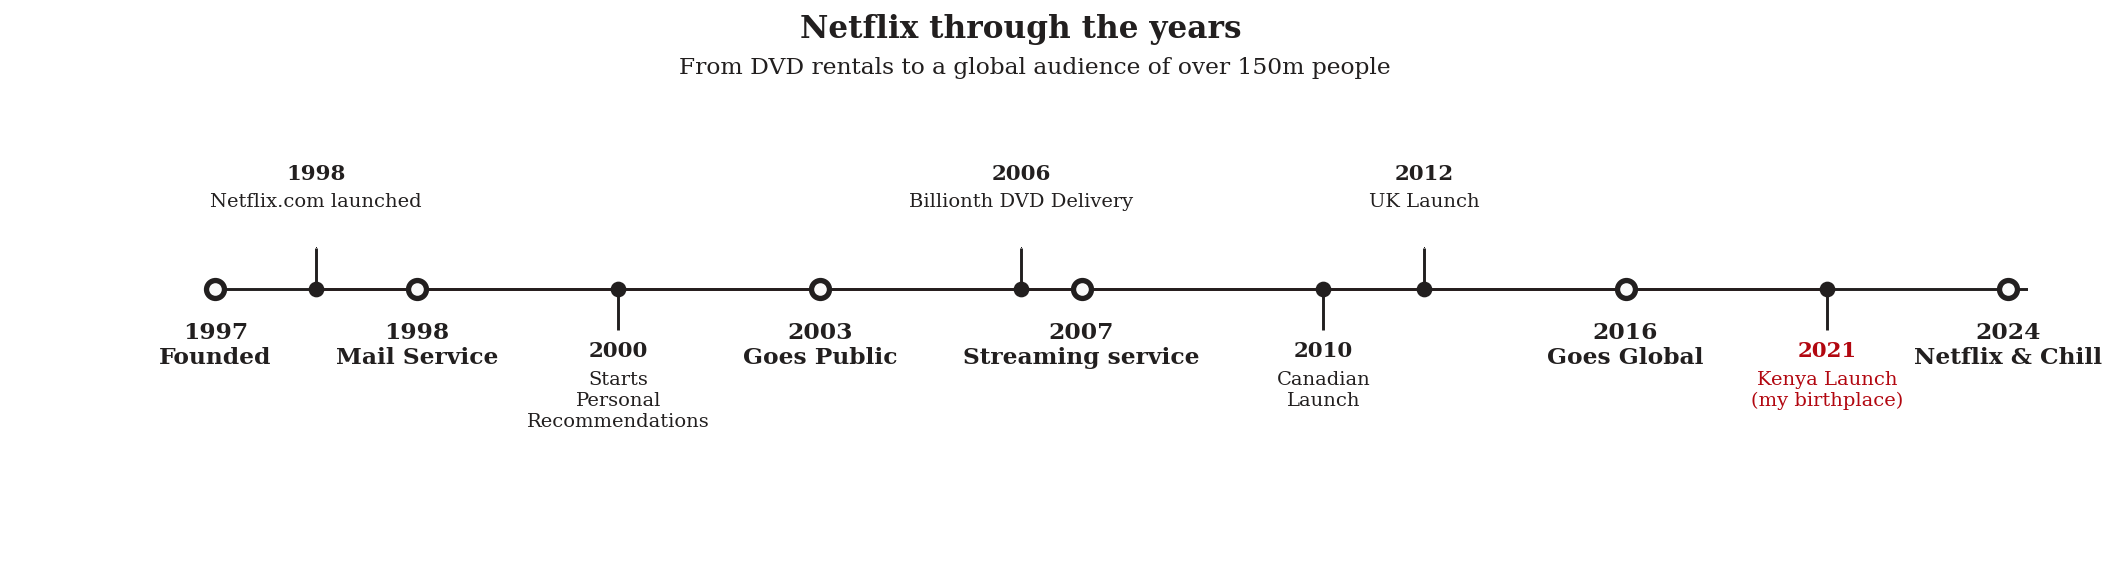

In [861]:
# Generate a timeline plot illustrating significant dates and events in the history of Netflix. 
# Main dates are represented by large circles on the timeline, while secondary dates are represented by smaller circles. Associated events are labeled below the timeline.

tl_dates = [
    "1997\nFounded",
    "1998\nMail Service",
    "2003\nGoes Public",
    "2007\nStreaming service",
    "2016\nGoes Global",
    "2024\nNetflix & Chill"
]

tl_x = [1, 2, 4, 5.3, 8, 9.9]

tl_sub_x = [1.5, 3, 5, 6.5, 7, 9]

tl_sub_times = [
    "1998","2000","2006","2010","2012","2021"
]

tl_text = [
    "Netflix.com launched",
    "Starts\nPersonal\nRecommendations","Billionth DVD Delivery","Canadian\nLaunch","UK Launch\n","Kenya Launch\n(my birthplace)"
]


fig, ax = plt.subplots(figsize=(15, 4), constrained_layout=True)  
ax.set_ylim(-2, 1.75)  
ax.set_xlim(0, 10)  

ax.axhline(0, xmin=0.1, xmax=1, c='#221f1f', zorder=1)  

ax.scatter(tl_x, np.zeros(len(tl_x)), s=120, c='#221f1f', zorder=2)  
ax.scatter(tl_x, np.zeros(len(tl_x)), s=30, c='#fafafa', zorder=3)  

ax.scatter(tl_sub_x, np.zeros(len(tl_sub_x)), s=50, c='#221f1f',zorder=4)  

for x, date in zip(tl_x, tl_dates):  
    ax.text(x, -0.55, date, ha='center',  
            fontfamily='serif', fontweight='bold',
            color='#221f1f',fontsize=12)
  
    
levels = np.zeros(len(tl_sub_x))  
levels[::2] = 0.3  
levels[1::2] = -0.3  
markerline, stemline, baseline = ax.stem(tl_sub_x, levels, use_line_collection=True)  
plt.setp(baseline, zorder=0)  
plt.setp(markerline, marker=',', color='#221f1f')  
plt.setp(stemline, color='#221f1f')  

for idx, x, time, txt in zip(range(1, len(tl_sub_x)+1), tl_sub_x, tl_sub_times, tl_text): 
    
    ax.text(x, 1.3*(idx%2)-0.5, time, ha='center', 
            fontfamily='serif', fontweight='bold',
            color='#221f1f' if idx!=len(tl_sub_x) else '#b20710', fontsize=11)  
        
    ax.text(x, 1.3*(idx%2)-0.6, txt, va='top', ha='center', 
        fontfamily='serif',color='#221f1f' if idx!=len(tl_sub_x) else '#b20710')  


for spine in ["left", "top", "right", "bottom"]:  
    ax.spines[spine].set_visible(False)  
    
ax.set_xticks([])  
ax.set_yticks([])  

ax.set_title("Netflix through the years", fontweight="bold", fontfamily='serif', fontsize=16, color='#221f1f')  
ax.text(3.3, 1.57, "From DVD rentals to a global audience of over 150m people", fontfamily='serif', fontsize=12, color='#221f1f')  

plt.show()  


**1. Netflix Content Type**

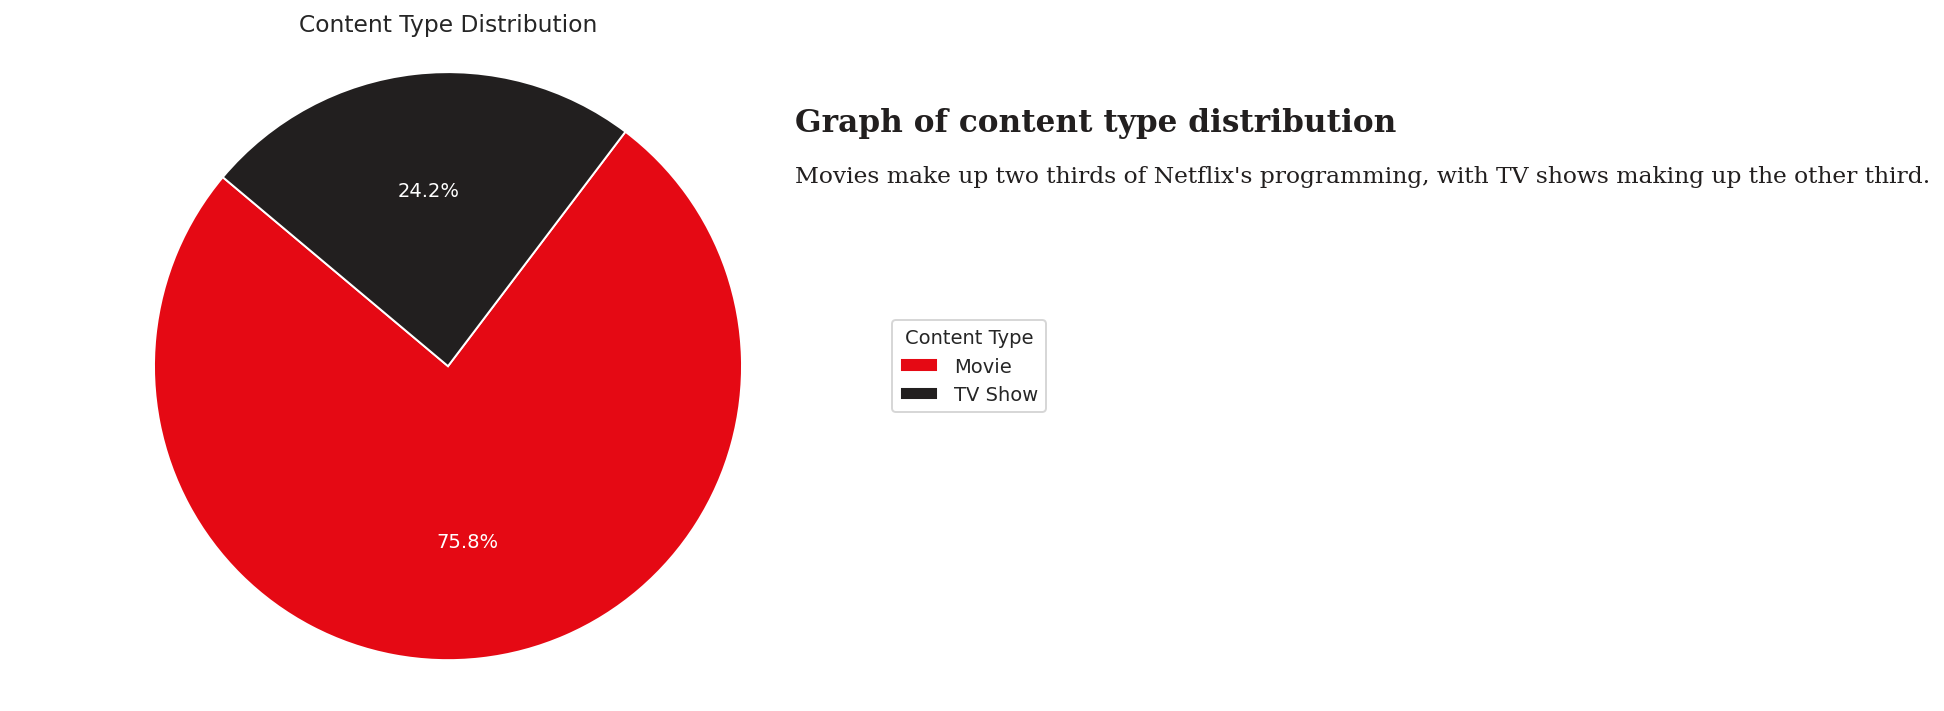

In [862]:
# Calculate the count of each unique value in the 'type' column, creates a pie chart to visualize the distribution of content types, sets the title of the pie chart, ensures the pie chart is drawn as a circle, adds a legend to label the pie chart slices with their content type, and finally displays the pie chart.

type_counts = df['type'].value_counts()

sns.set_style("whitegrid")

plt.figure(figsize=(8, 6))
plt.pie(type_counts, labels=type_counts.index, autopct='%1.1f%%', startangle=140, colors=['#e50914', '#221f1f'], textprops={'color': 'white'})
plt.title('Content Type Distribution')
plt.axis('equal')  

plt.text(0.9, 0.9, 'Graph of content type distribution', fontsize=16, fontweight='bold', fontfamily='serif', ha='left', va='top',color='#221f1f', transform=plt.gca().transAxes)
plt.text(0.9, 0.85, '''
Movies make up two thirds of Netflix's programming, with TV shows making up the other third.''',
fontsize=12, fontweight='light', fontfamily='serif', ha='left', va='top',color='#221f1f', transform=plt.gca().transAxes)

plt.legend(type_counts.index, title="Content Type", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

plt.show()

Movies make up two thirds of Netflix's programming, with TV shows making up the other third.

**2. Growth in content over the years**

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



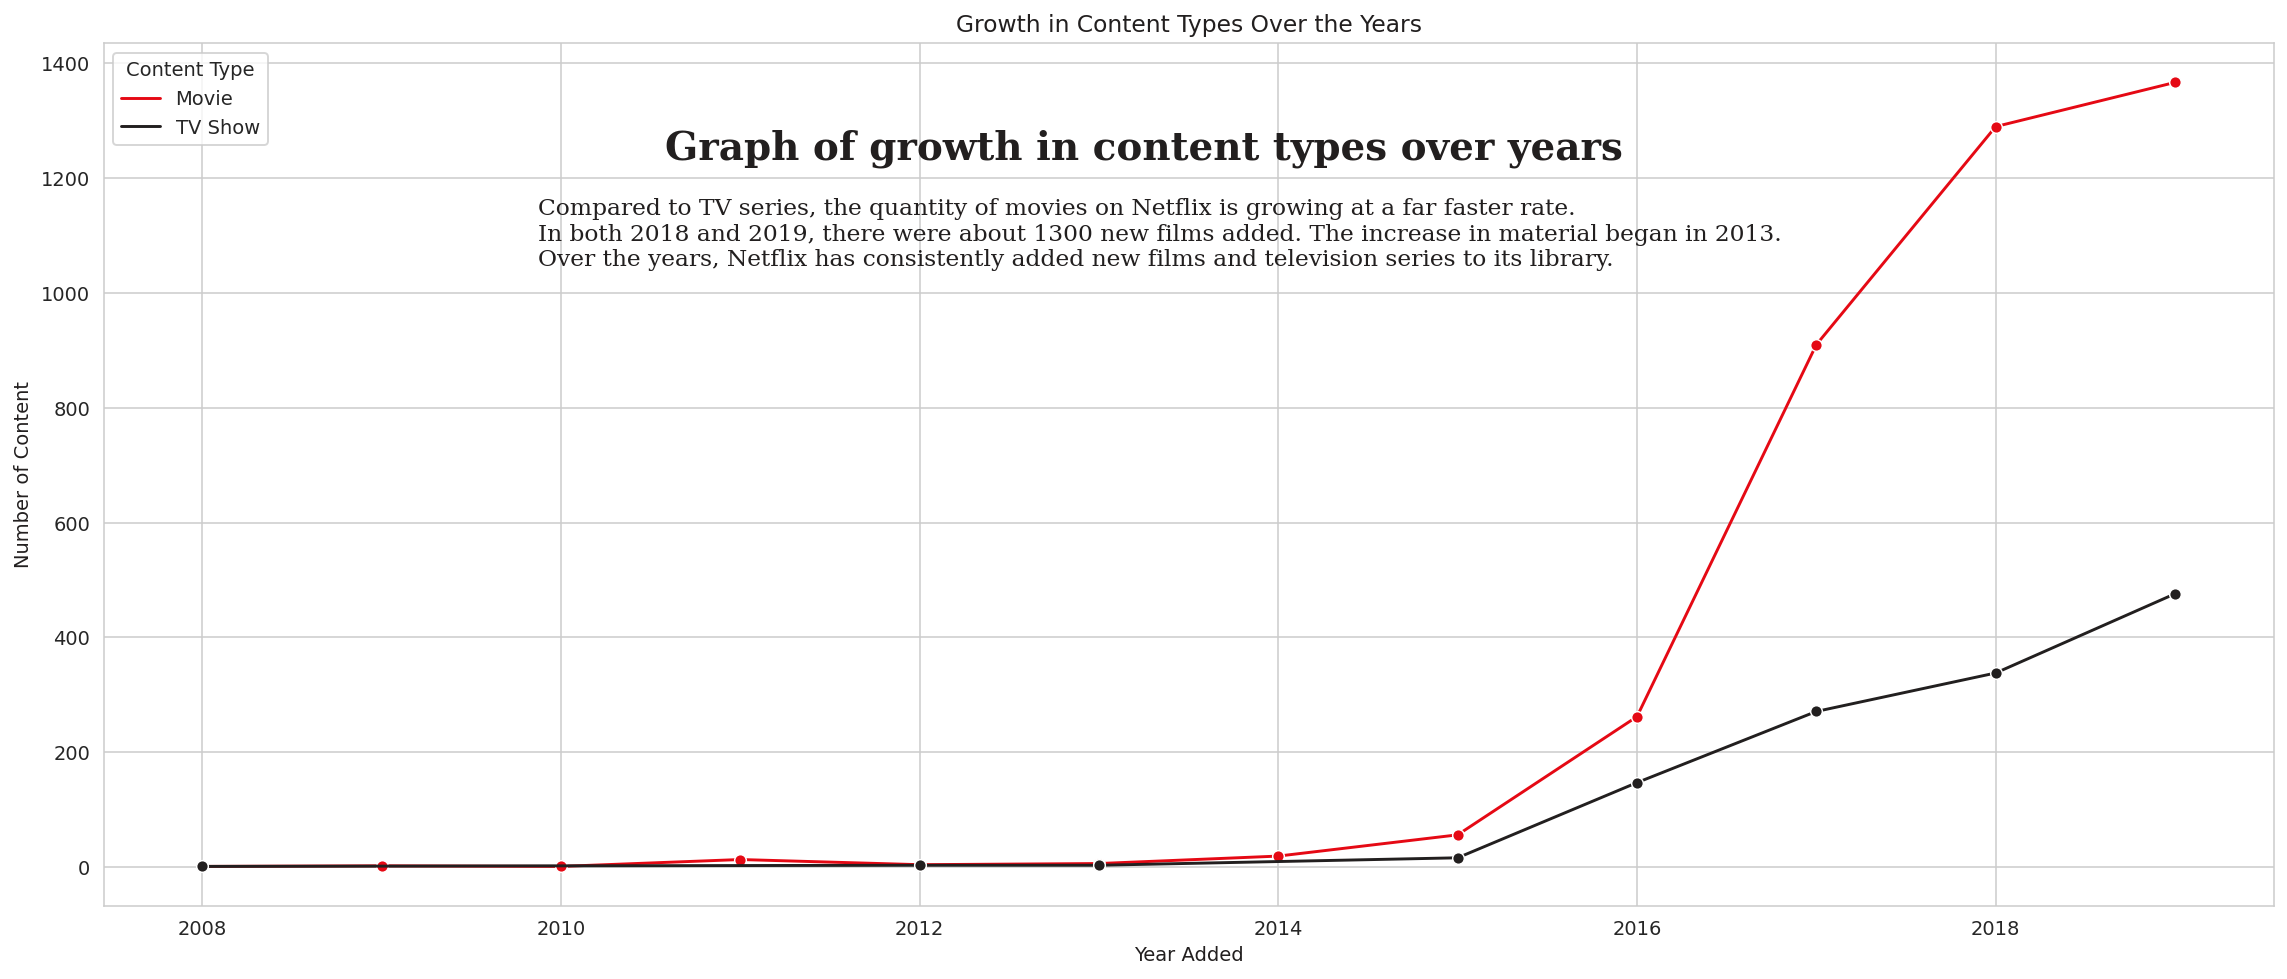

In [863]:
# Create a line plot showing the growth in content types (Movies and TV Shows) over the years

content_growth = df.groupby(['year_added', 'type']).size().reset_index(name='count')

custom_colors = {'Movie': '#e50914', 'TV Show': '#221f1f'}

plt.figure(figsize=(20, 8))
sns.lineplot(data=content_growth, x='year_added', y='count', hue='type', marker='o', palette=custom_colors)
plt.title('Growth in Content Types Over the Years', color='#221f1f')
plt.xlabel('Year Added', color='#221f1f')
plt.ylabel('Number of Content', color='#221f1f')
plt.grid(True, color='#CCCCCC')
plt.legend(title='Content Type')

plt.text(0.7, 0.9, 'Graph of growth in content types over years', fontsize=20, fontweight='bold', fontfamily='serif', ha='right', va='top',color='#221f1f', transform=plt.gca().transAxes)
plt.text(0.2, 0.85, '''
Compared to TV series, the quantity of movies on Netflix is growing at a far faster rate. 
In both 2018 and 2019, there were about 1300 new films added. The increase in material began in 2013. 
Over the years, Netflix has consistently added new films and television series to its library.''',
fontsize=12, fontweight='light', fontfamily='serif', ha='left', va='top',color='#221f1f', transform=plt.gca().transAxes)

plt.show()

Compared to TV series, the quantity of movies on Netflix is growing at a far faster rate. In both 2018 and 2019, there were about 1300 new films added. The increase in material began in 2013. Over the years, Netflix has consistently added new films and television series to its library. 

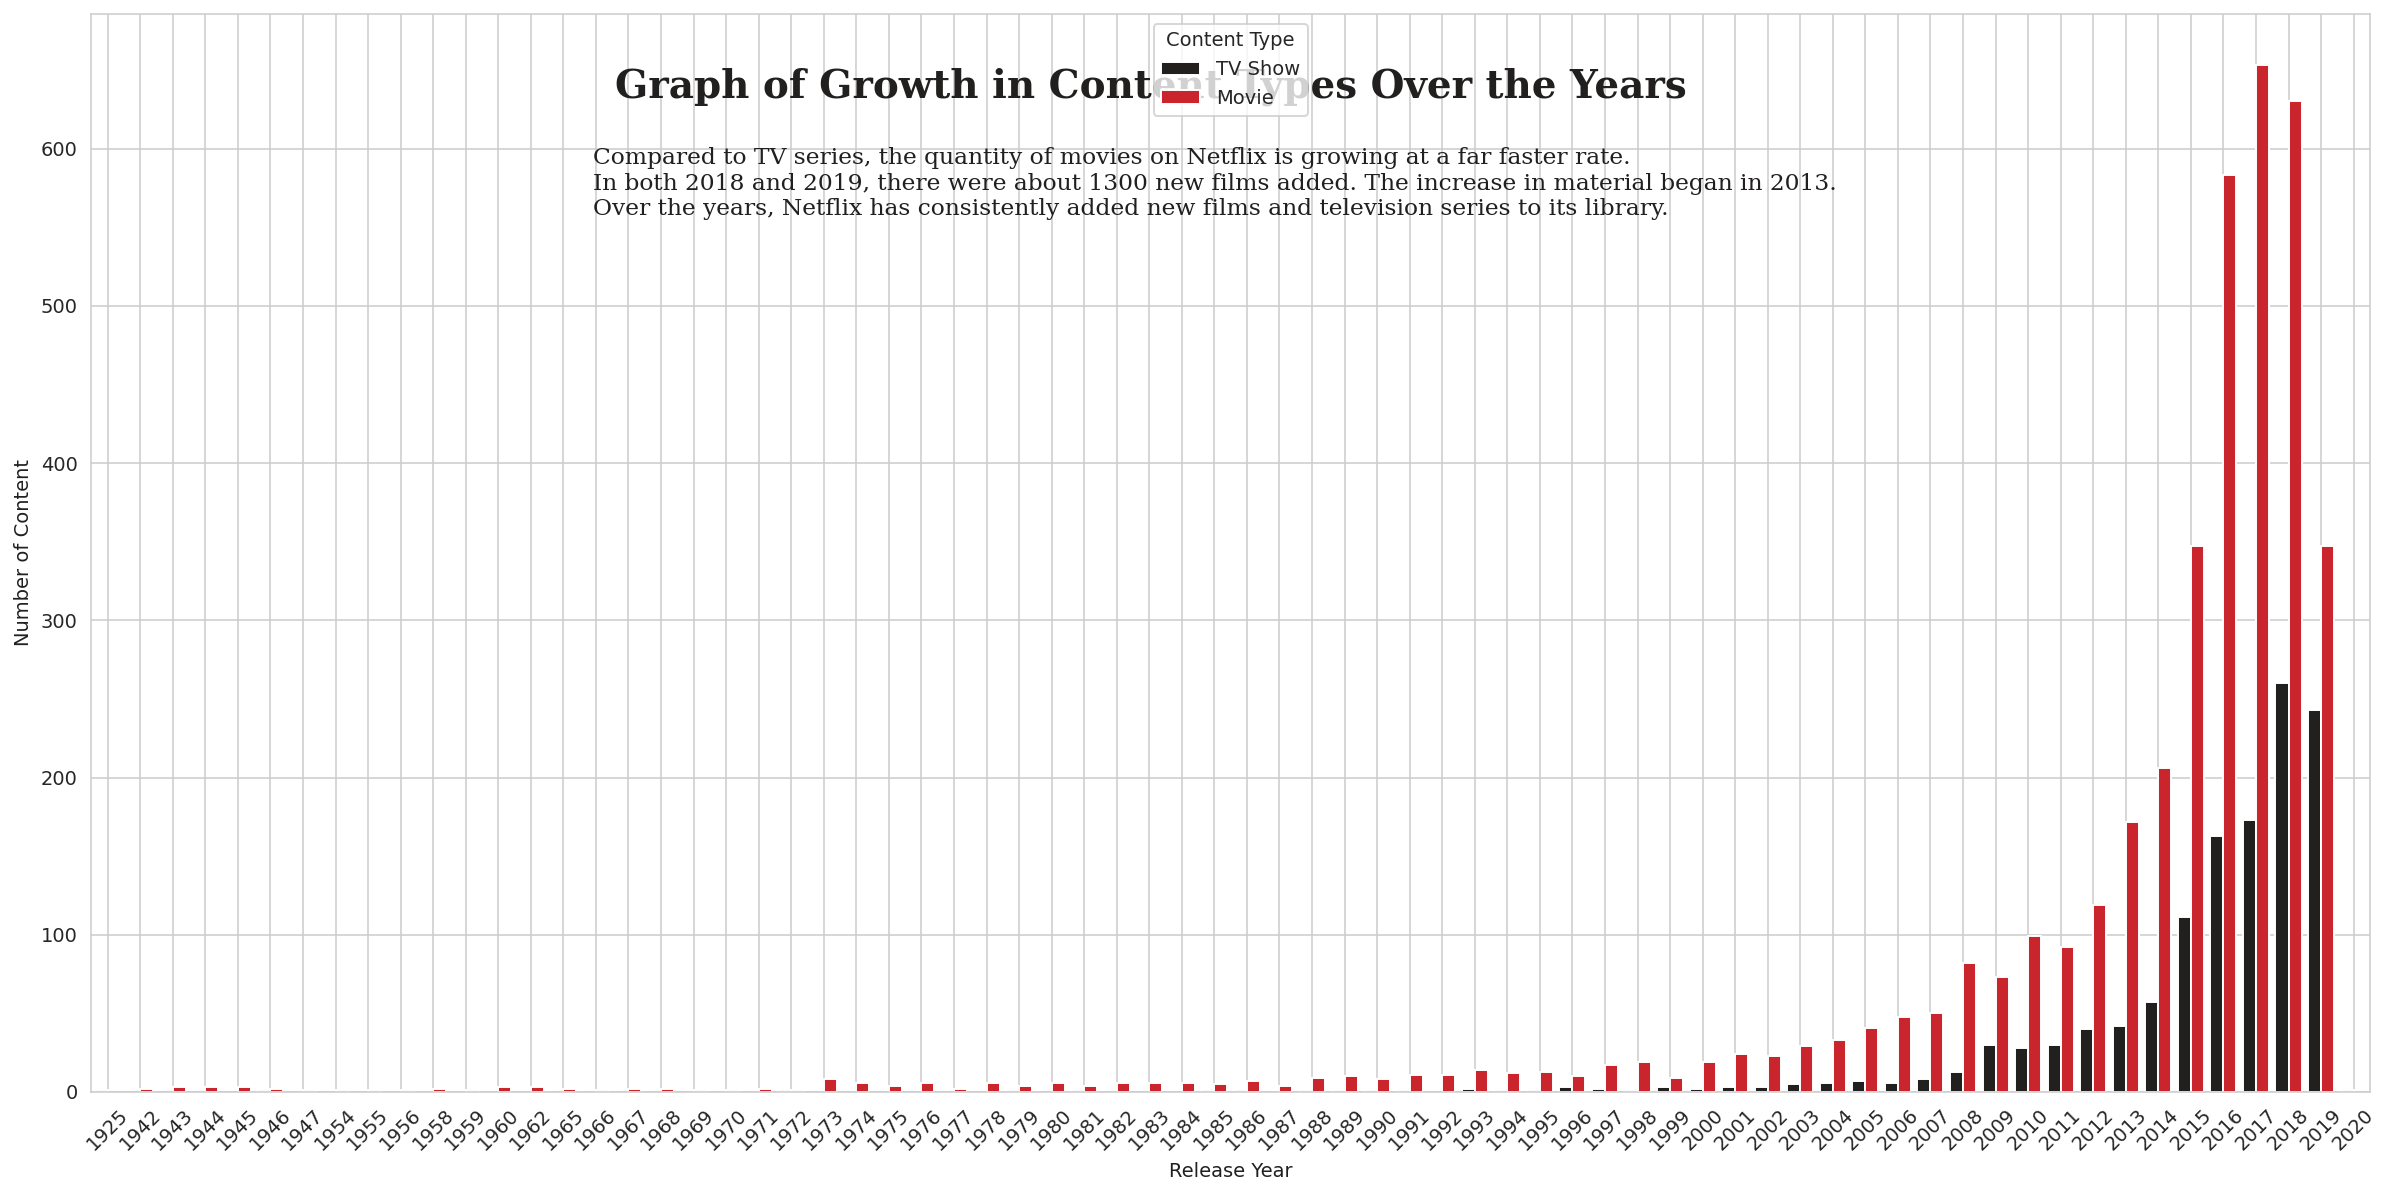

In [864]:
# Create a chat of content type added over the years

content_growth = df.groupby(['release_year', 'type']).size().reset_index(name='count')

custom_colors = {'Movie': '#e50914', 'TV Show': '#221f1f'}

plt.figure(figsize=(21, 10))
sns.barplot(data=content_growth, x='release_year', y='count', hue='type', palette=custom_colors)
plt.xlabel('Release Year', color='#221f1f')
plt.ylabel('Number of Content', color='#221f1f')
plt.grid(True, color='#CCCCCC')
plt.legend(title='Content Type')

plt.xticks(rotation=45)

plt.text(0.7, 0.95, 'Graph of Growth in Content Types Over the Years', fontsize=20, fontweight='bold', fontfamily='serif', ha='right', va='top',color='#221f1f', transform=plt.gca().transAxes)
plt.text(0.22, 0.9, '''
Compared to TV series, the quantity of movies on Netflix is growing at a far faster rate. 
In both 2018 and 2019, there were about 1300 new films added. The increase in material began in 2013. 
Over the years, Netflix has consistently added new films and television series to its library.''',
fontsize=12, fontweight='light', fontfamily='serif', ha='left', va='top',color='#221f1f', transform=plt.gca().transAxes)

plt.show()

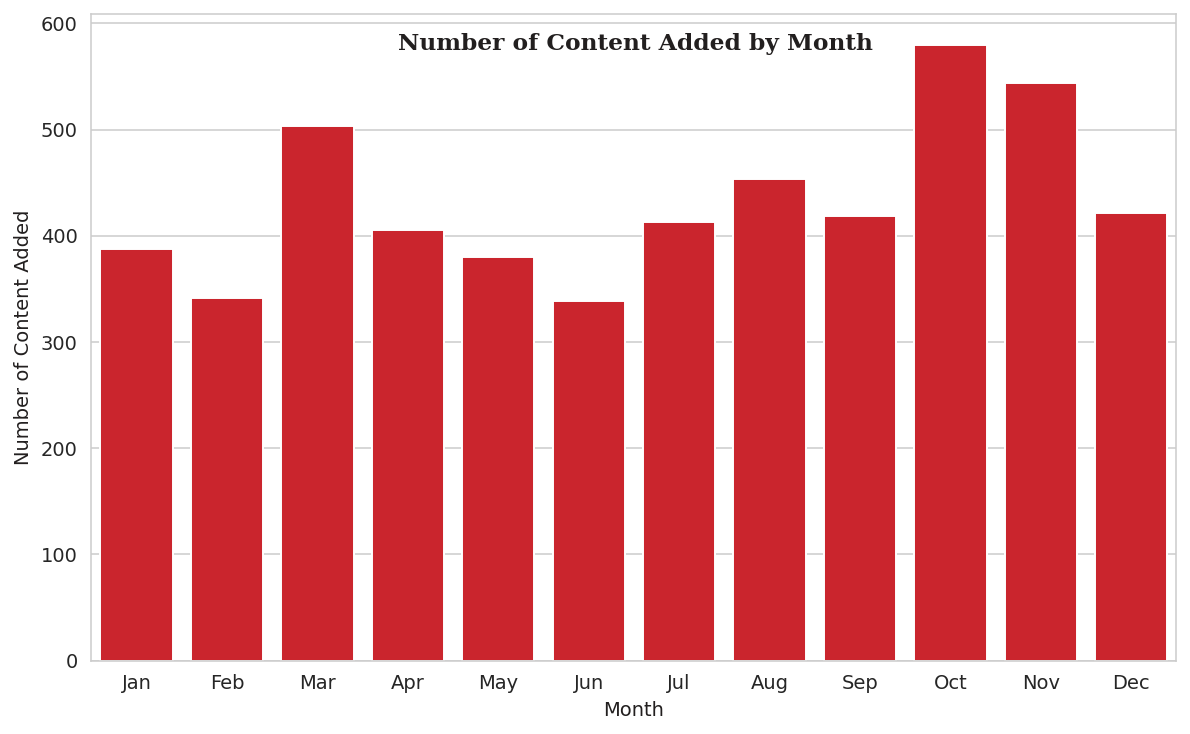

In [865]:
# Create a bar plot using Seaborn showing the number of content added by month.

monthly_content_count = df['month_added'].value_counts().sort_index()

plt.figure(figsize=(10, 6))
sns.barplot(x=monthly_content_count.index, y=monthly_content_count.values, color='#e50914')
plt.xlabel('Month', color='#221f1f')
plt.ylabel('Number of Content Added', color='#221f1f')
plt.xticks(range(12), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid(axis='y', color='#CCCCCC')

plt.text(0.72, 0.97, 'Number of Content Added by Month', fontsize=12, fontweight='bold', fontfamily='serif', ha='right', va='top',color='#221f1f', transform=plt.gca().transAxes)

plt.show()

**3. Content by country**

In [866]:
# Create a chloropleth of the distribution of netflix content by country

country_codes={'afghanistan': 'AFG',
 'albania': 'ALB',
 'algeria': 'DZA',
 'american samoa': 'ASM',
 'andorra': 'AND',
 'angola': 'AGO',
 'anguilla': 'AIA',
 'antigua and barbuda': 'ATG',
 'argentina': 'ARG',
 'armenia': 'ARM',
 'aruba': 'ABW',
 'australia': 'AUS',
 'austria': 'AUT',
 'azerbaijan': 'AZE',
 'bahamas': 'BHM',
 'bahrain': 'BHR',
 'bangladesh': 'BGD',
 'barbados': 'BRB',
 'belarus': 'BLR',
 'belgium': 'BEL',
 'belize': 'BLZ',
 'benin': 'BEN',
 'bermuda': 'BMU',
 'bhutan': 'BTN',
 'bolivia': 'BOL',
 'bosnia and herzegovina': 'BIH',
 'botswana': 'BWA',
 'brazil': 'BRA',
 'british virgin islands': 'VGB',
 'brunei': 'BRN',
 'bulgaria': 'BGR',
 'burkina faso': 'BFA',
 'burma': 'MMR',
 'burundi': 'BDI',
 'cabo verde': 'CPV',
 'cambodia': 'KHM',
 'cameroon': 'CMR',
 'canada': 'CAN',
 'cayman islands': 'CYM',
 'central african republic': 'CAF',
 'chad': 'TCD',
 'chile': 'CHL',
 'china': 'CHN',
 'colombia': 'COL',
 'comoros': 'COM',
 'congo democratic': 'COD',
 'Congo republic': 'COG',
 'cook islands': 'COK',
 'costa rica': 'CRI',
 "cote d'ivoire": 'CIV',
 'croatia': 'HRV',
 'cuba': 'CUB',
 'curacao': 'CUW',
 'cyprus': 'CYP',
 'czech republic': 'CZE',
 'denmark': 'DNK',
 'djibouti': 'DJI',
 'dominica': 'DMA',
 'dominican republic': 'DOM',
 'ecuador': 'ECU',
 'egypt': 'EGY',
 'el salvador': 'SLV',
 'equatorial guinea': 'GNQ',
 'eritrea': 'ERI',
 'estonia': 'EST',
 'ethiopia': 'ETH',
 'falkland islands': 'FLK',
 'faroe islands': 'FRO',
 'fiji': 'FJI',
 'finland': 'FIN',
 'france': 'FRA',
 'french polynesia': 'PYF',
 'gabon': 'GAB',
 'gambia, the': 'GMB',
 'georgia': 'GEO',
 'germany': 'DEU',
 'ghana': 'GHA',
 'gibraltar': 'GIB',
 'greece': 'GRC',
 'greenland': 'GRL',
 'grenada': 'GRD',
 'guam': 'GUM',
 'guatemala': 'GTM',
 'guernsey': 'GGY',
 'guinea-bissau': 'GNB',
 'guinea': 'GIN',
 'guyana': 'GUY',
 'haiti': 'HTI',
 'honduras': 'HND',
 'hong kong': 'HKG',
 'hungary': 'HUN',
 'iceland': 'ISL',
 'india': 'IND',
 'indonesia': 'IDN',
 'iran': 'IRN',
 'iraq': 'IRQ',
 'ireland': 'IRL',
 'isle of man': 'IMN',
 'israel': 'ISR',
 'italy': 'ITA',
 'jamaica': 'JAM',
 'japan': 'JPN',
 'jersey': 'JEY',
 'jordan': 'JOR',
 'kazakhstan': 'KAZ',
 'kenya': 'KEN',
 'kiribati': 'KIR',
 'north korea': 'PRK',
 'south korea': 'KOR',
 'kosovo': 'KSV',
 'kuwait': 'KWT',
 'kyrgyzstan': 'KGZ',
 'laos': 'LAO',
 'latvia': 'LVA',
 'lebanon': 'LBN',
 'lesotho': 'LSO',
 'liberia': 'LBR',
 'libya': 'LBY',
 'liechtenstein': 'LIE',
 'lithuania': 'LTU',
 'luxembourg': 'LUX',
 'macau': 'MAC',
 'macedonia': 'MKD',
 'madagascar': 'MDG',
 'malawi': 'MWI',
 'malaysia': 'MYS',
 'maldives': 'MDV',
 'mali': 'MLI',
 'malta': 'MLT',
 'marshall islands': 'MHL',
 'mauritania': 'MRT',
 'mauritius': 'MUS',
 'mexico': 'MEX',
 'micronesia': 'FSM',
 'moldova': 'MDA',
 'monaco': 'MCO',
 'mongolia': 'MNG',
 'montenegro': 'MNE',
 'morocco': 'MAR',
 'mozambique': 'MOZ',
 'namibia': 'NAM',
 'nepal': 'NPL',
 'netherlands': 'NLD',
 'new caledonia': 'NCL',
 'new zealand': 'NZL',
 'nicaragua': 'NIC',
 'nigeria': 'NGA',
 'niger': 'NER',
 'niue': 'NIU',
 'northern mariana islands': 'MNP',
 'norway': 'NOR',
 'oman': 'OMN',
 'pakistan': 'PAK',
 'palau': 'PLW',
 'panama': 'PAN',
 'papua new guinea': 'PNG',
 'paraguay': 'PRY',
 'peru': 'PER',
 'philippines': 'PHL',
 'poland': 'POL',
 'portugal': 'PRT',
 'puerto rico': 'PRI',
 'qatar': 'QAT',
 'romania': 'ROU',
 'russia': 'RUS',
 'rwanda': 'RWA',
 'saint kitts and nevis': 'KNA',
 'saint lucia': 'LCA',
 'saint martin': 'MAF',
 'saint pierre and miquelon': 'SPM',
 'saint vincent and the grenadines': 'VCT',
 'samoa': 'WSM',
 'san marino': 'SMR',
 'sao tome and principe': 'STP',
 'saudi arabia': 'SAU',
 'senegal': 'SEN',
 'serbia': 'SRB',
 'seychelles': 'SYC',
 'sierra leone': 'SLE',
 'singapore': 'SGP',
 'sint maarten': 'SXM',
 'slovakia': 'SVK',
 'slovenia': 'SVN',
 'solomon islands': 'SLB',
 'somalia': 'SOM',
 'south africa': 'ZAF',
 'south sudan': 'SSD',
 'spain': 'ESP',
 'sri lanka': 'LKA',
 'sudan': 'SDN',
 'suriname': 'SUR',
 'swaziland': 'SWZ',
 'sweden': 'SWE',
 'switzerland': 'CHE',
 'syria': 'SYR',
 'taiwan': 'TWN',
 'tajikistan': 'TJK',
 'tanzania': 'TZA',
 'thailand': 'THA',
 'timor-leste': 'TLS',
 'togo': 'TGO',
 'tonga': 'TON',
 'trinidad and tobago': 'TTO',
 'tunisia': 'TUN',
 'turkey': 'TUR',
 'turkmenistan': 'TKM',
 'tuvalu': 'TUV',
 'uganda': 'UGA',
 'ukraine': 'UKR',
 'united arab emirates': 'ARE',
 'united kingdom': 'GBR',
 'united states': 'USA',
 'uruguay': 'URY',
 'uzbekistan': 'UZB',
 'vanuatu': 'VUT',
 'venezuela': 'VEN',
 'vietnam': 'VNM',
 'virgin islands': 'VGB',
 'west bank': 'WBG',
 'yemen': 'YEM',
 'zambia': 'ZMB',
 'zimbabwe': 'ZWE'}

df_agg = df.groupby(['country', 'type']).size().reset_index(name='count')

df_agg['country'] = df_agg['country'].str.lower()  
df_agg = df_agg.merge(pd.DataFrame(country_codes.items(), columns=['country', 'country_code']), on='country')

custom_colors = {
    'Movie': '#1f77b4',  
    'TV Show': '#ff7f0e', 
}

fig = px.choropleth(df_agg, 
                    locations="country_code",
                    color="count",
                    hover_name="country",
                    hover_data=["type"],
                    projection="natural earth",
                    locationmode="ISO-3",
                    color_continuous_scale=[(0, "#ffffff"), (0.5, "#e50914"), (1, "#b20710")], 
                    title="Distribution of Show Types by Country")
fig.update_geos(showcountries=True)
fig.update_layout(height=600, width=1000)  
fig.show()

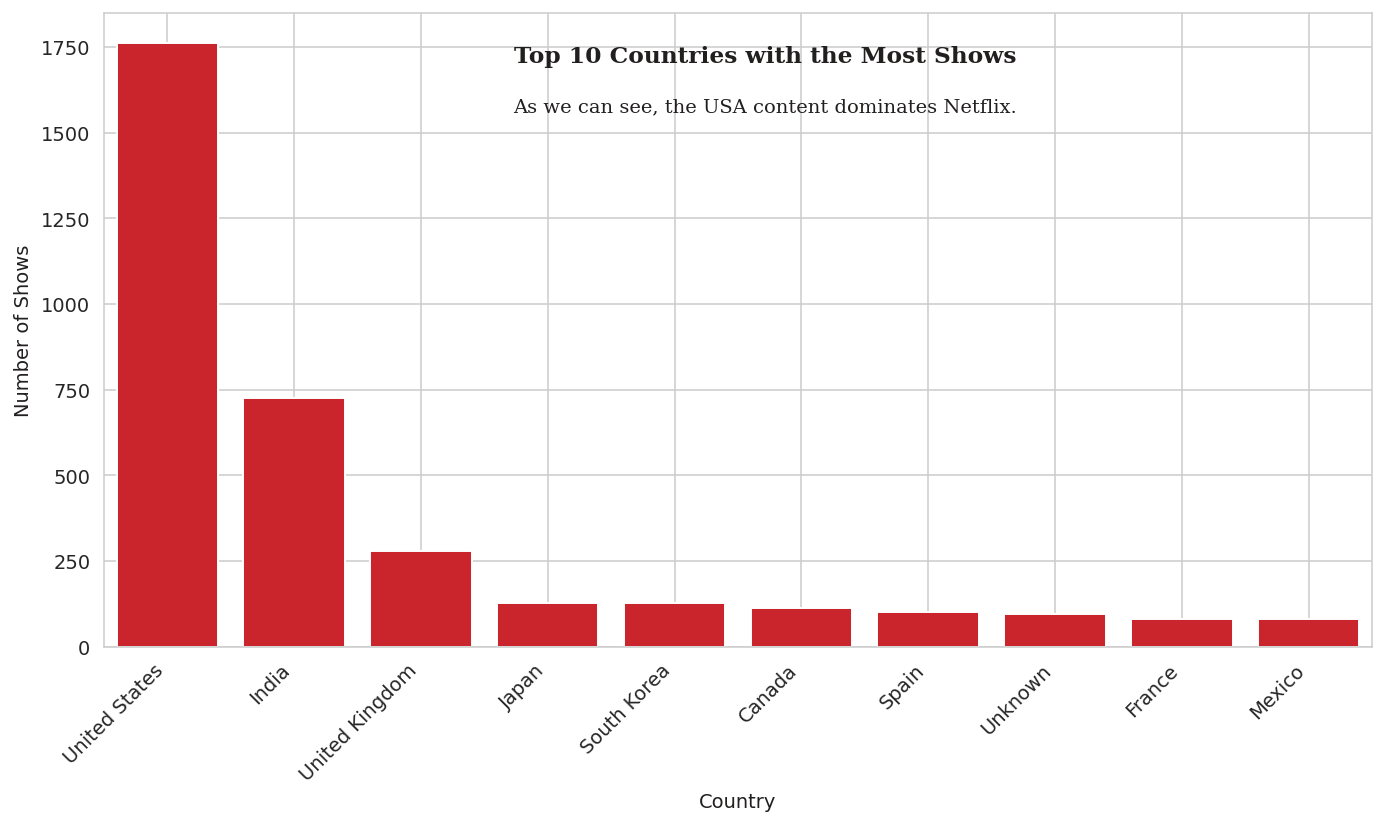

In [867]:
# Get the top 10 countries with the most shows
top_countries = df.groupby(['country']).size().reset_index(name='count').nlargest(10, 'count')

custom_colors = ['#e50914']

plt.figure(figsize=(10, 6))
sns.barplot(data=top_countries, x='country', y='count', palette=custom_colors)
plt.xlabel('Country', color='#221f1f')
plt.ylabel('Number of Shows', color='#221f1f')
plt.xticks(rotation=45, ha='right')
plt.grid(True, color='#CCCCCC')
plt.tight_layout()

plt.text(0.72, 0.95, 'Top 10 Countries with the Most Shows', fontsize=12, fontweight='bold', fontfamily='serif', ha='right', va='top',color='#221f1f', transform=plt.gca().transAxes)
plt.text(0.72, 0.9, '''
As we can see, the USA content dominates Netflix.''',
fontsize=10, fontweight='light', fontfamily='serif', ha='right', va='top',color='#221f1f', transform=plt.gca().transAxes)

plt.show()

As we can see, the USA content dominates Netflix

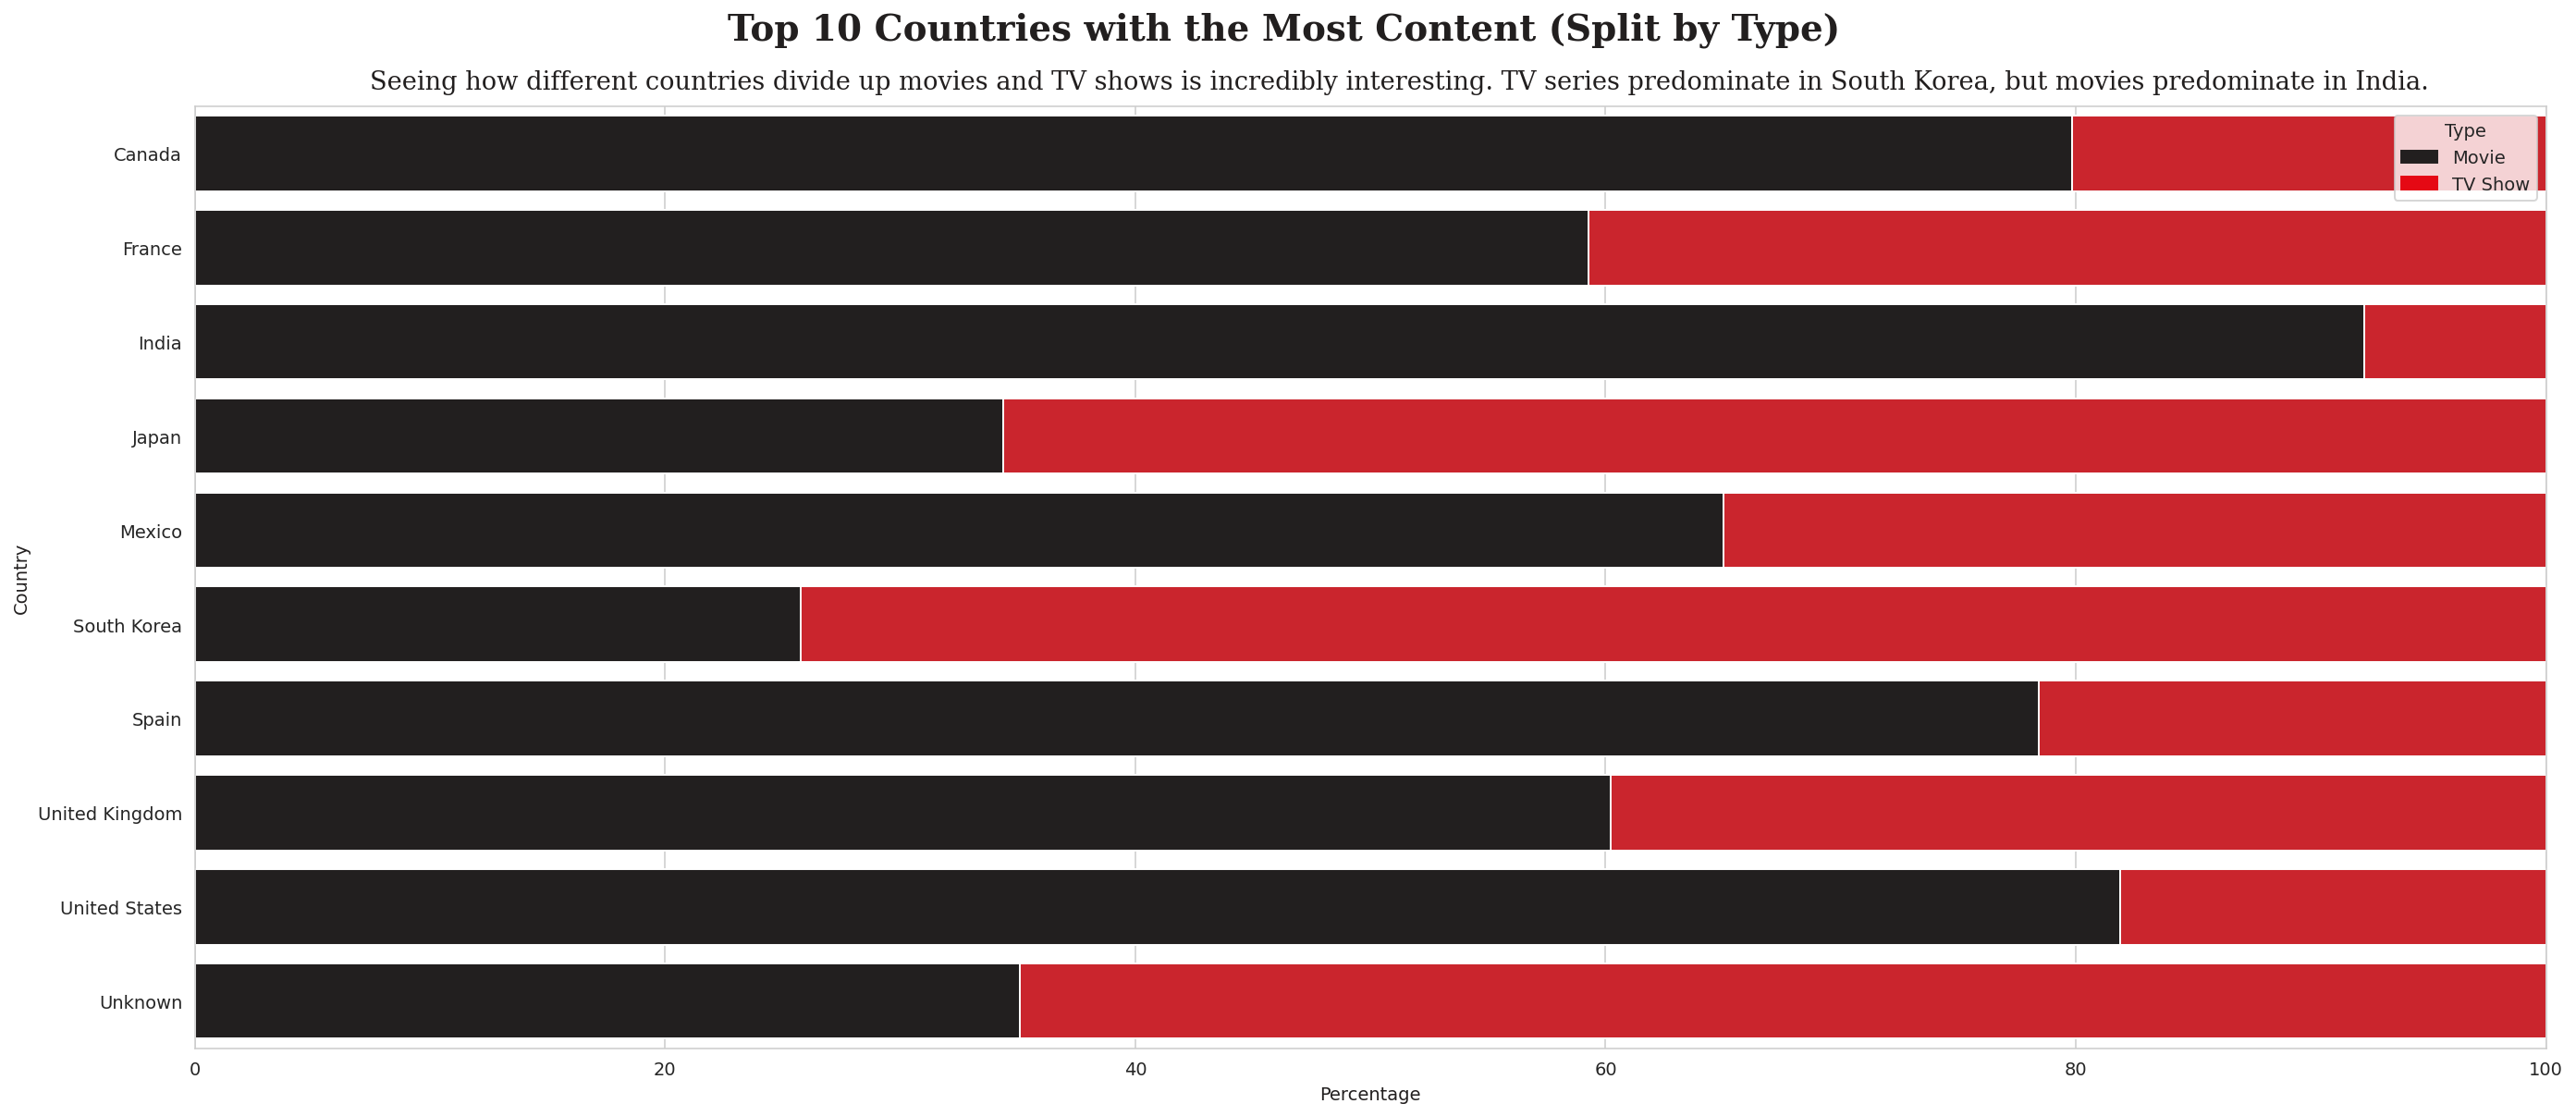

In [868]:
# Create a stacked bar plot of the  top 10 countries with the most content & split the content by type

top_countries = df['country'].value_counts().head(10).index

df_top_countries = df[df['country'].isin(top_countries)]

df_counts = df_top_countries.groupby(['country', 'type']).size().unstack(fill_value=0)

df_percentages = df_counts.div(df_counts.sum(axis=1), axis=0) * 100

colors = ["#221f1f", "#e50914"]

plt.figure(figsize=(20, 8))
sns.barplot(data=df_percentages, y=df_percentages.index, x=df_percentages.sum(axis=1), palette=colors, orient='h')
left = df_percentages.cumsum(axis=1).shift(1, axis=1).fillna(0)
for i, col in enumerate(df_percentages.columns):
    sns.barplot(data=df_percentages, y=df_percentages.index, x=col, color=colors[i], left=left[col])
    
legend_patches = [Patch(color=color, label=label) for color, label in zip(colors, df_percentages.columns)]
plt.legend(handles=legend_patches, title='Type', loc='upper right')

plt.xlabel('Percentage', color='#221f1f')
plt.ylabel('Country', color='#221f1f')
plt.xlim(0, 100)  # Set x-axis limit to 0-100
plt.tight_layout()
plt.grid(True, color='#CCCCCC')

plt.text(0.7, 1.1, 'Top 10 Countries with the Most Content (Split by Type)', fontsize=20, fontweight='bold', fontfamily='serif', ha='right', va='top',color='#221f1f', transform=plt.gca().transAxes)
plt.text(0.95, 1.07, '''
Seeing how different countries divide up movies and TV shows is incredibly interesting. TV series predominate in South Korea, but movies predominate in India.''',
fontsize=14, fontweight='light', fontfamily='serif', ha='right', va='top',color='#221f1f', transform=plt.gca().transAxes)

plt.show()

Seeing how different countries divide up movies and TV shows is incredibly interesting. TV series predominate in South Korea, but movies predominate in India.

**4. Distribution of movies duration**

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



<Figure size 2800x840 with 0 Axes>

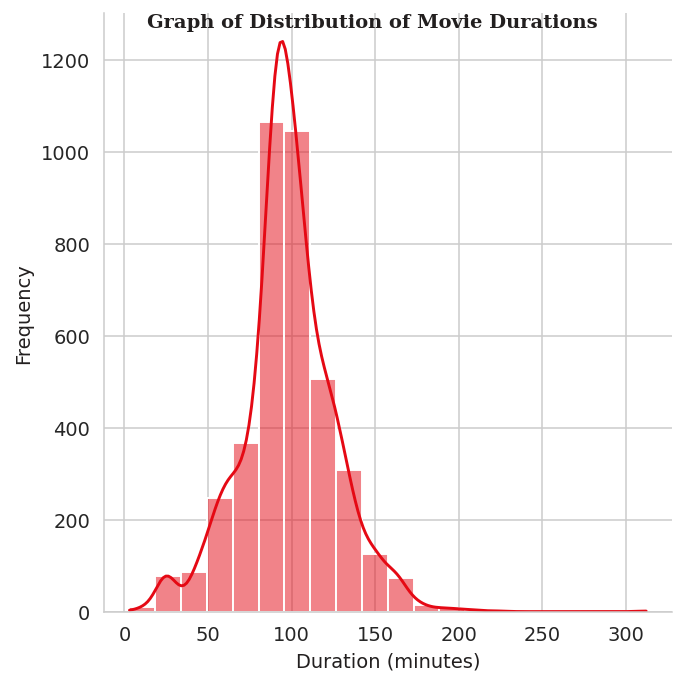

In [869]:
# Visualize the distribution of movie durations, to understand the typical duration range of movies available on Netflix.

movies_df = df[df['type'] == 'Movie']

custom_colors = ["#e50914"]

plt.figure(figsize=(20, 6))
sns.displot(movies_df['duration'], kde=True, bins=20, color=custom_colors[0])
plt.xlabel('Duration (minutes)', color='#221f1f')
plt.ylabel('Frequency', color='#221f1f')
plt.grid(True, color='#CCCCCC')

plt.text(0.87, 1, 'Graph of Distribution of Movie Durations', fontsize=10, fontweight='bold', fontfamily='serif', ha='right', va='top',color='#221f1f', transform=plt.gca().transAxes)

plt.show()

**5.  Rating distribution by movie or tv show**

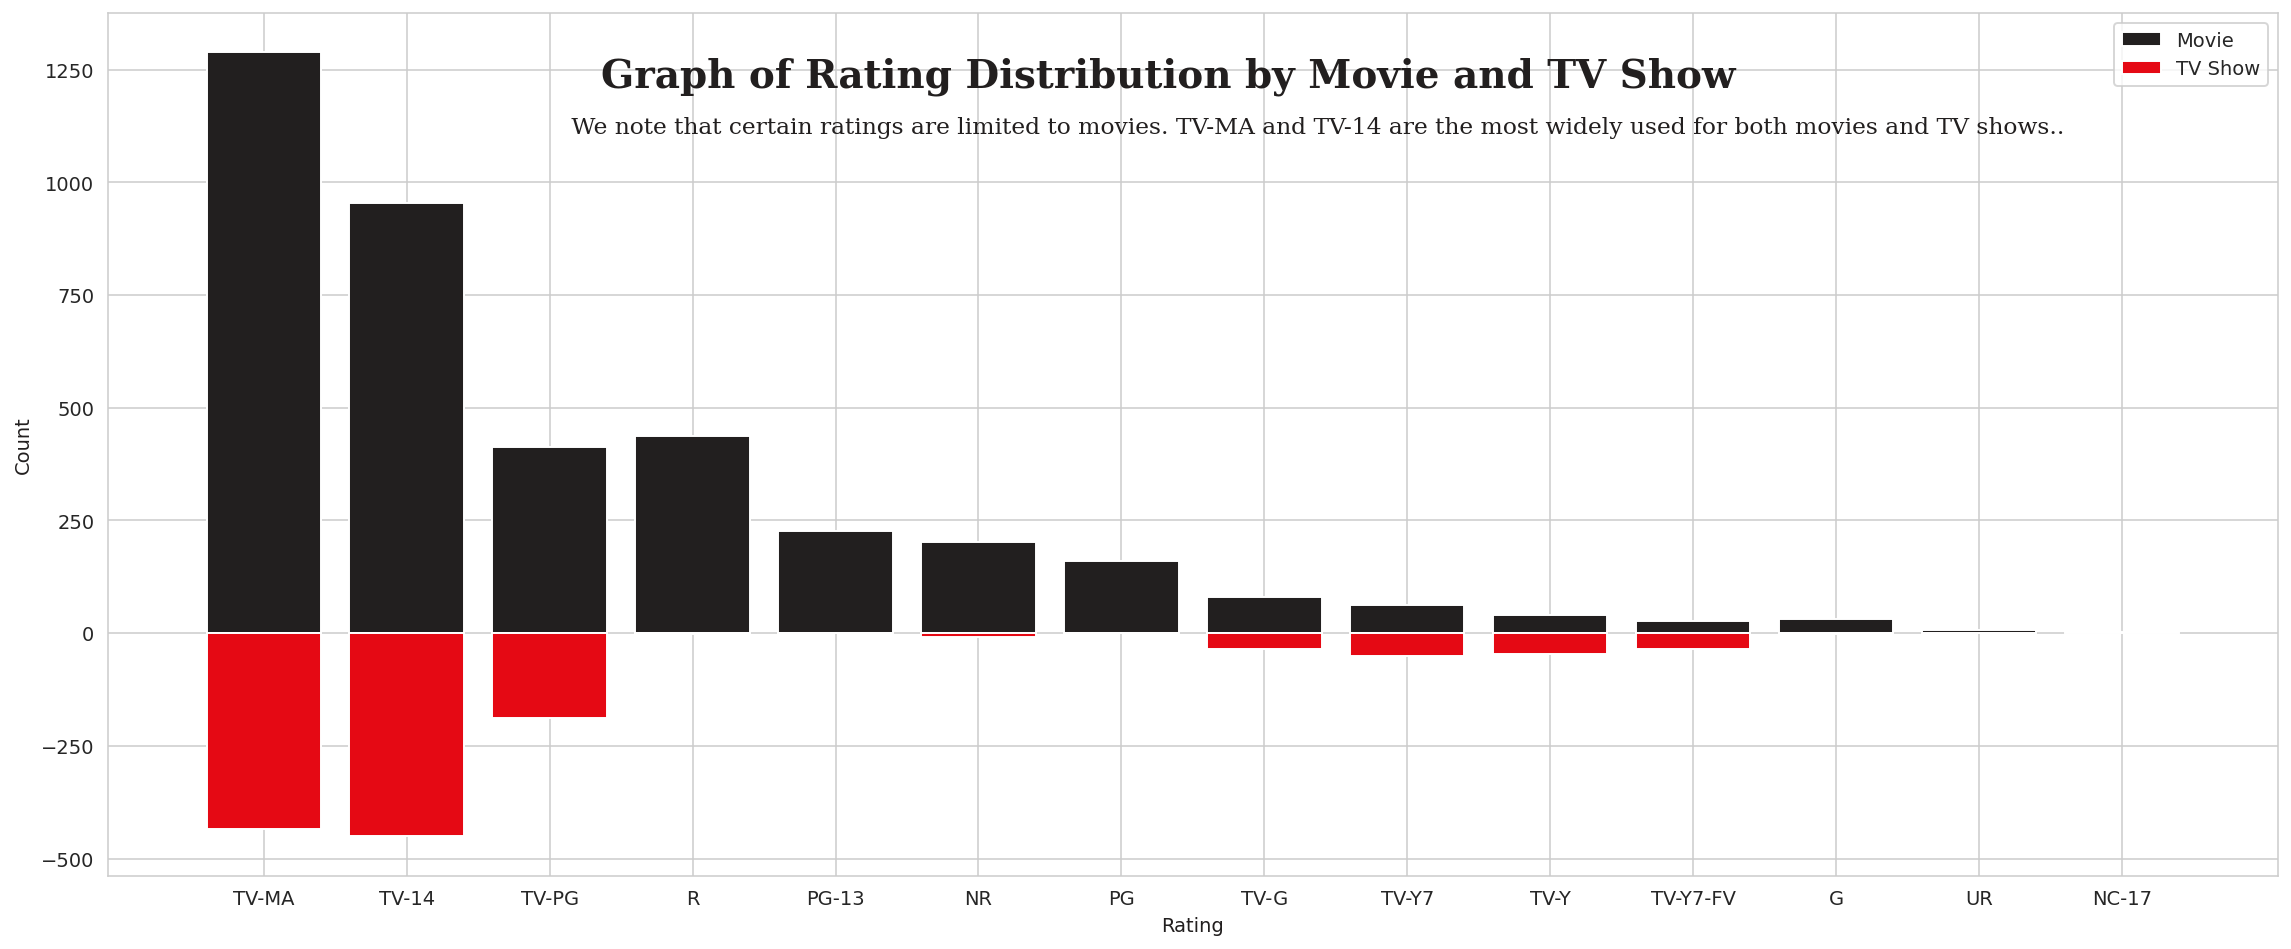

In [870]:
# Compare the distribution of content ratings between movies and TV shows on Netflix, providing insights into the prevalence of different content ratings across the two types of content.

count_df = df.groupby(['type', 'rating']).size().unstack(fill_value=0)

count_df = count_df.loc[:, count_df.sum().sort_values(ascending=False).index]

movie_color = '#221f1f'
tv_show_color = '#e50914' 

fig, ax = plt.subplots(figsize=(20, 8))

ax.bar(count_df.columns, count_df.loc['Movie'], color=movie_color, label='Movie')
ax.bar(count_df.columns, -count_df.loc['TV Show'], color=tv_show_color, label='TV Show')

ax.set_xlabel('Rating', color='#221f1f')
ax.set_ylabel('Count', color='#221f1f')
plt.grid(True, color='#CCCCCC')

plt.text(0.75, 0.95, 'Graph of Rating Distribution by Movie and TV Show', fontsize=20, fontweight='bold', fontfamily='serif', ha='right', va='top',color='#221f1f', transform=plt.gca().transAxes)
plt.text(0.21, 0.91, '''
 We note that certain ratings are limited to movies. TV-MA and TV-14 are the most widely used for both movies and TV shows..''',
fontsize=12, fontweight='light', fontfamily='serif', ha='left', va='top',color='#221f1f', transform=plt.gca().transAxes)

ax.legend()

plt.show()


We note that certain ratings are limited to movies. TV-MA and TV-14 are the most widely used for both movies and TV shows.

**6. Correlation between Genres**

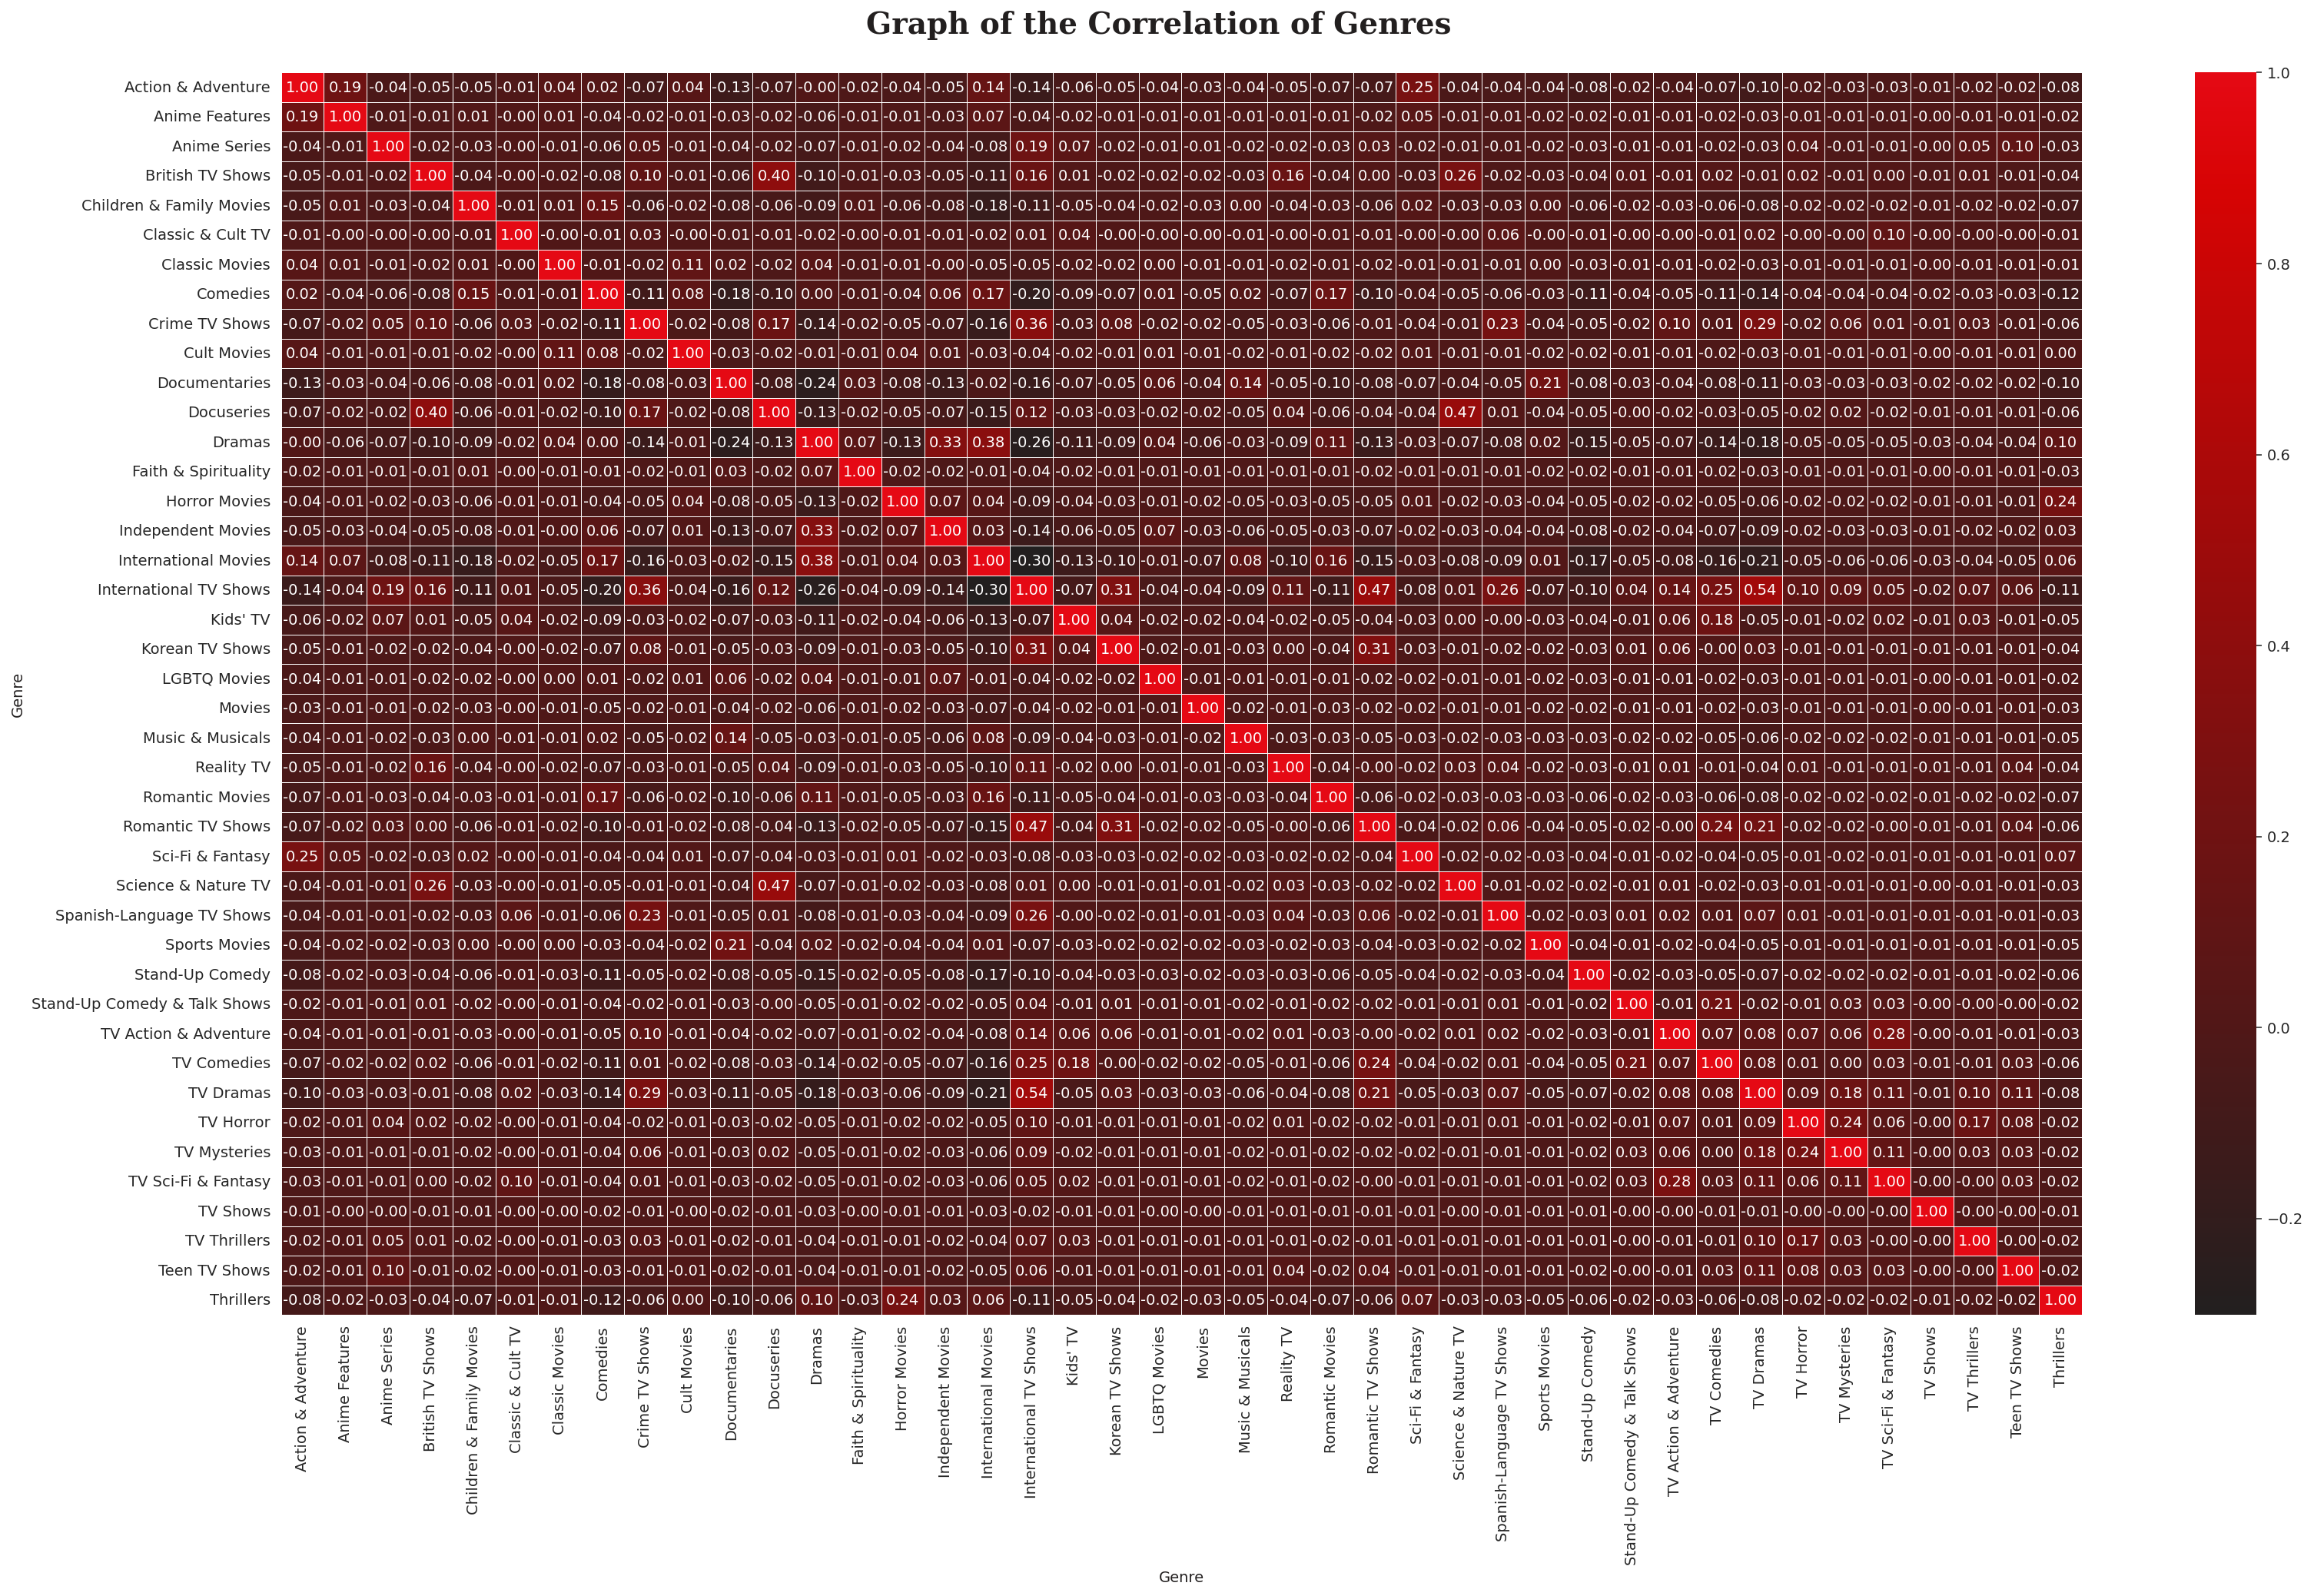

In [871]:
# Understand the relationships between different genres in the Netflix dataset, highlighting which genres tend to co-occur more frequently.

binary_encoded = df['listed_in'].str.get_dummies(', ')

correlation_matrix = binary_encoded.corr()

color_range = ['#221f1f', '#351c1c', '#471919', '#591616', '#6b1313', '#7d1010', '#8f0d0d', '#a10a0a', '#b30808', '#c50606', '#d70404', '#e50914']
cmap = LinearSegmentedColormap.from_list("Custom", color_range)

plt.figure(figsize=(27, 15))
sns.heatmap(correlation_matrix, cmap=cmap, annot=True, fmt=".2f", linewidths=0.5)
plt.xlabel('Genre', color='#221f1f')
plt.ylabel('Genre', color='#221f1f')
plt.grid(True, color='#CCCCCC')

plt.text(0.65, 1.05, 'Graph of the Correlation of Genres', fontsize=20, fontweight='bold', fontfamily='serif', ha='right', va='top',color='#221f1f', transform=plt.gca().transAxes)

plt.show()

**7. Top categories**

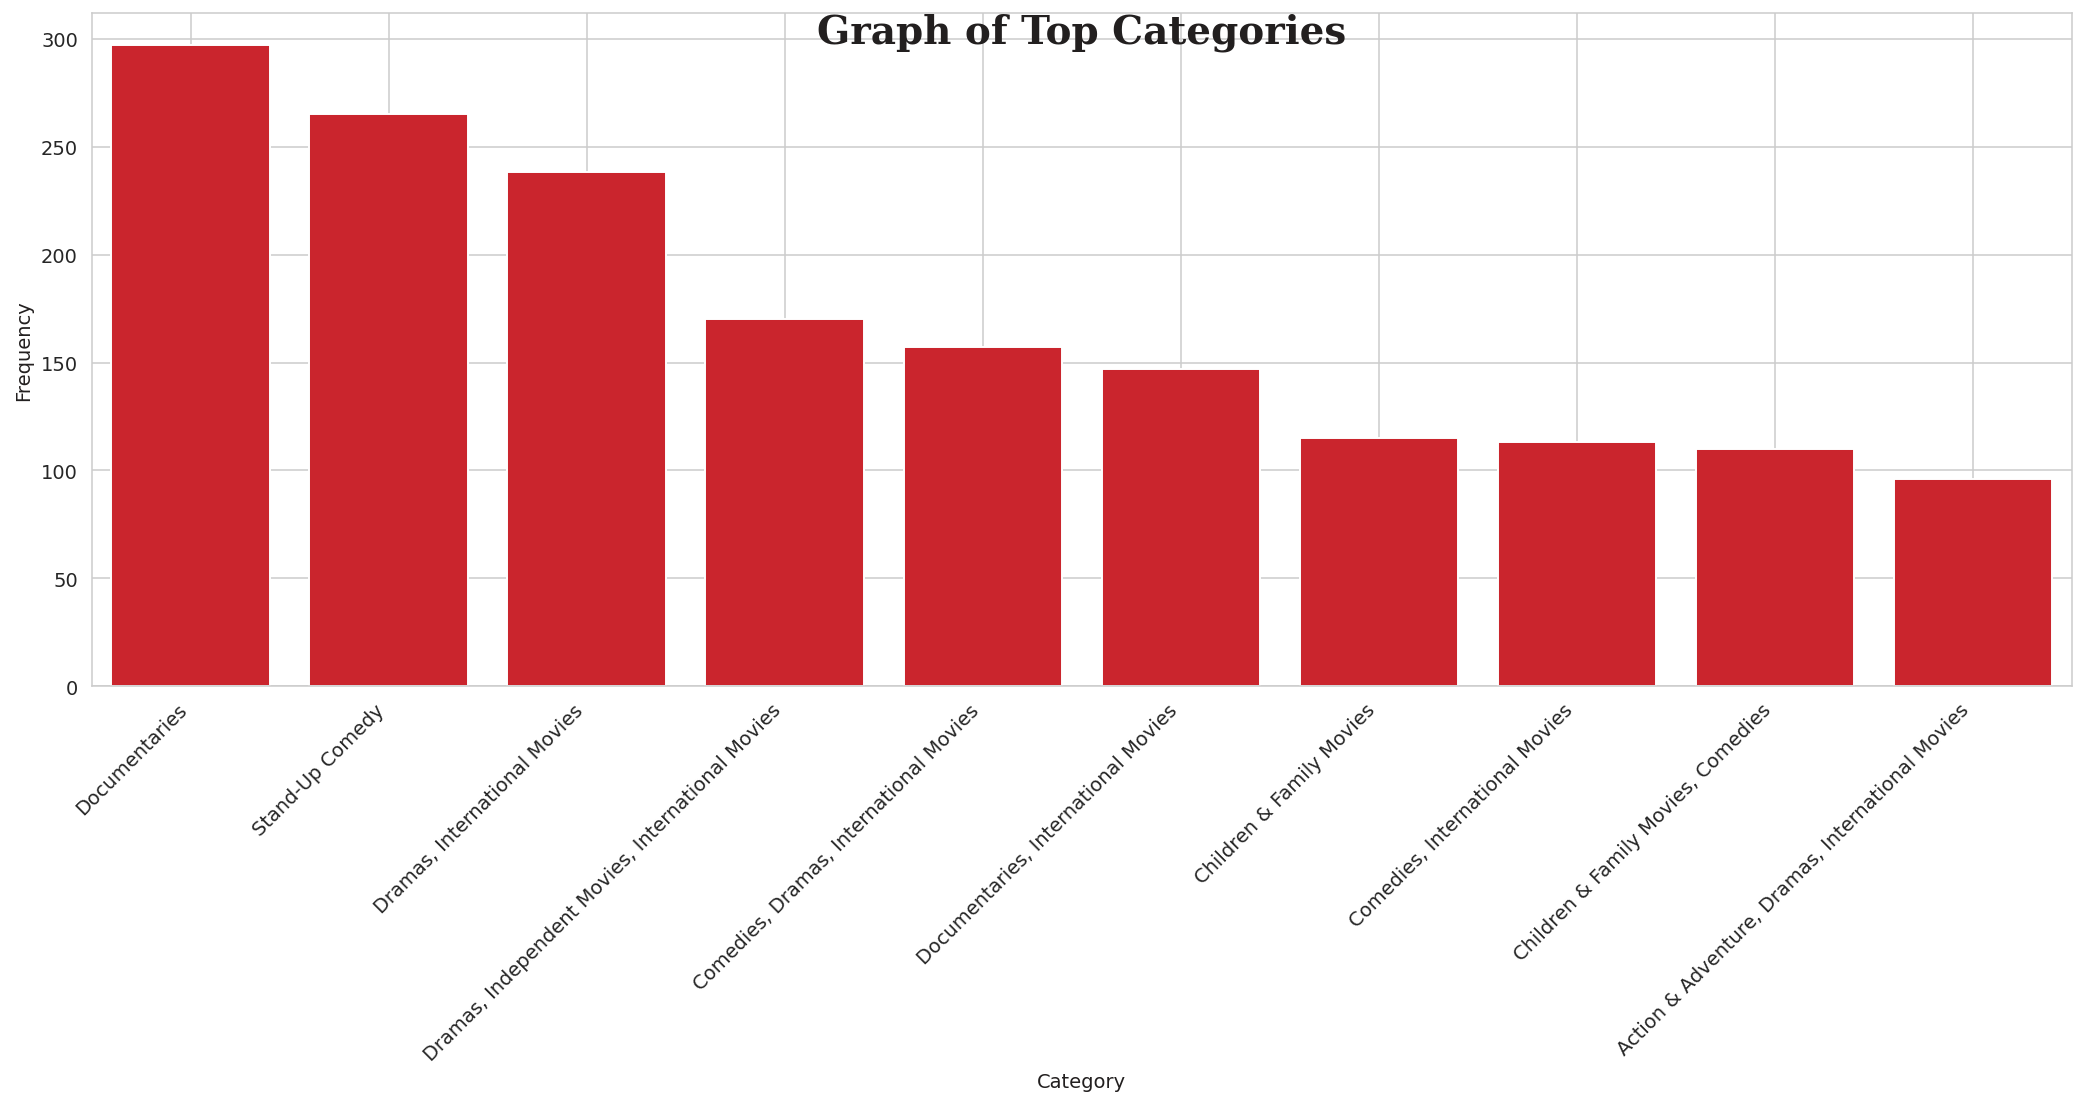

In [872]:
# Identify the most common categories of content available on Netflix, providing insights into the content preferences of the platform's users.

top_categories = df['listed_in'].value_counts().head(10)

top_categories_df = top_categories.reset_index()
top_categories_df.columns = ['Category', 'Frequency']

plt.figure(figsize=(15, 8))
sns.barplot(data=top_categories_df, x='Category', y='Frequency', color='#e50914')
plt.xlabel('Category', color='#221f1f')
plt.ylabel('Frequency', color='#221f1f')
plt.xticks(rotation=45, ha='right')
plt.grid(True, color='#CCCCCC')
plt.tight_layout()

plt.text(0.5, 1, 'Graph of Top Categories', fontsize=20, fontweight='bold', fontfamily='serif', ha='center', va='top',color='#221f1f', transform=plt.gca().transAxes)

plt.show()

**8. 10 actors for each of the top 10 countries**

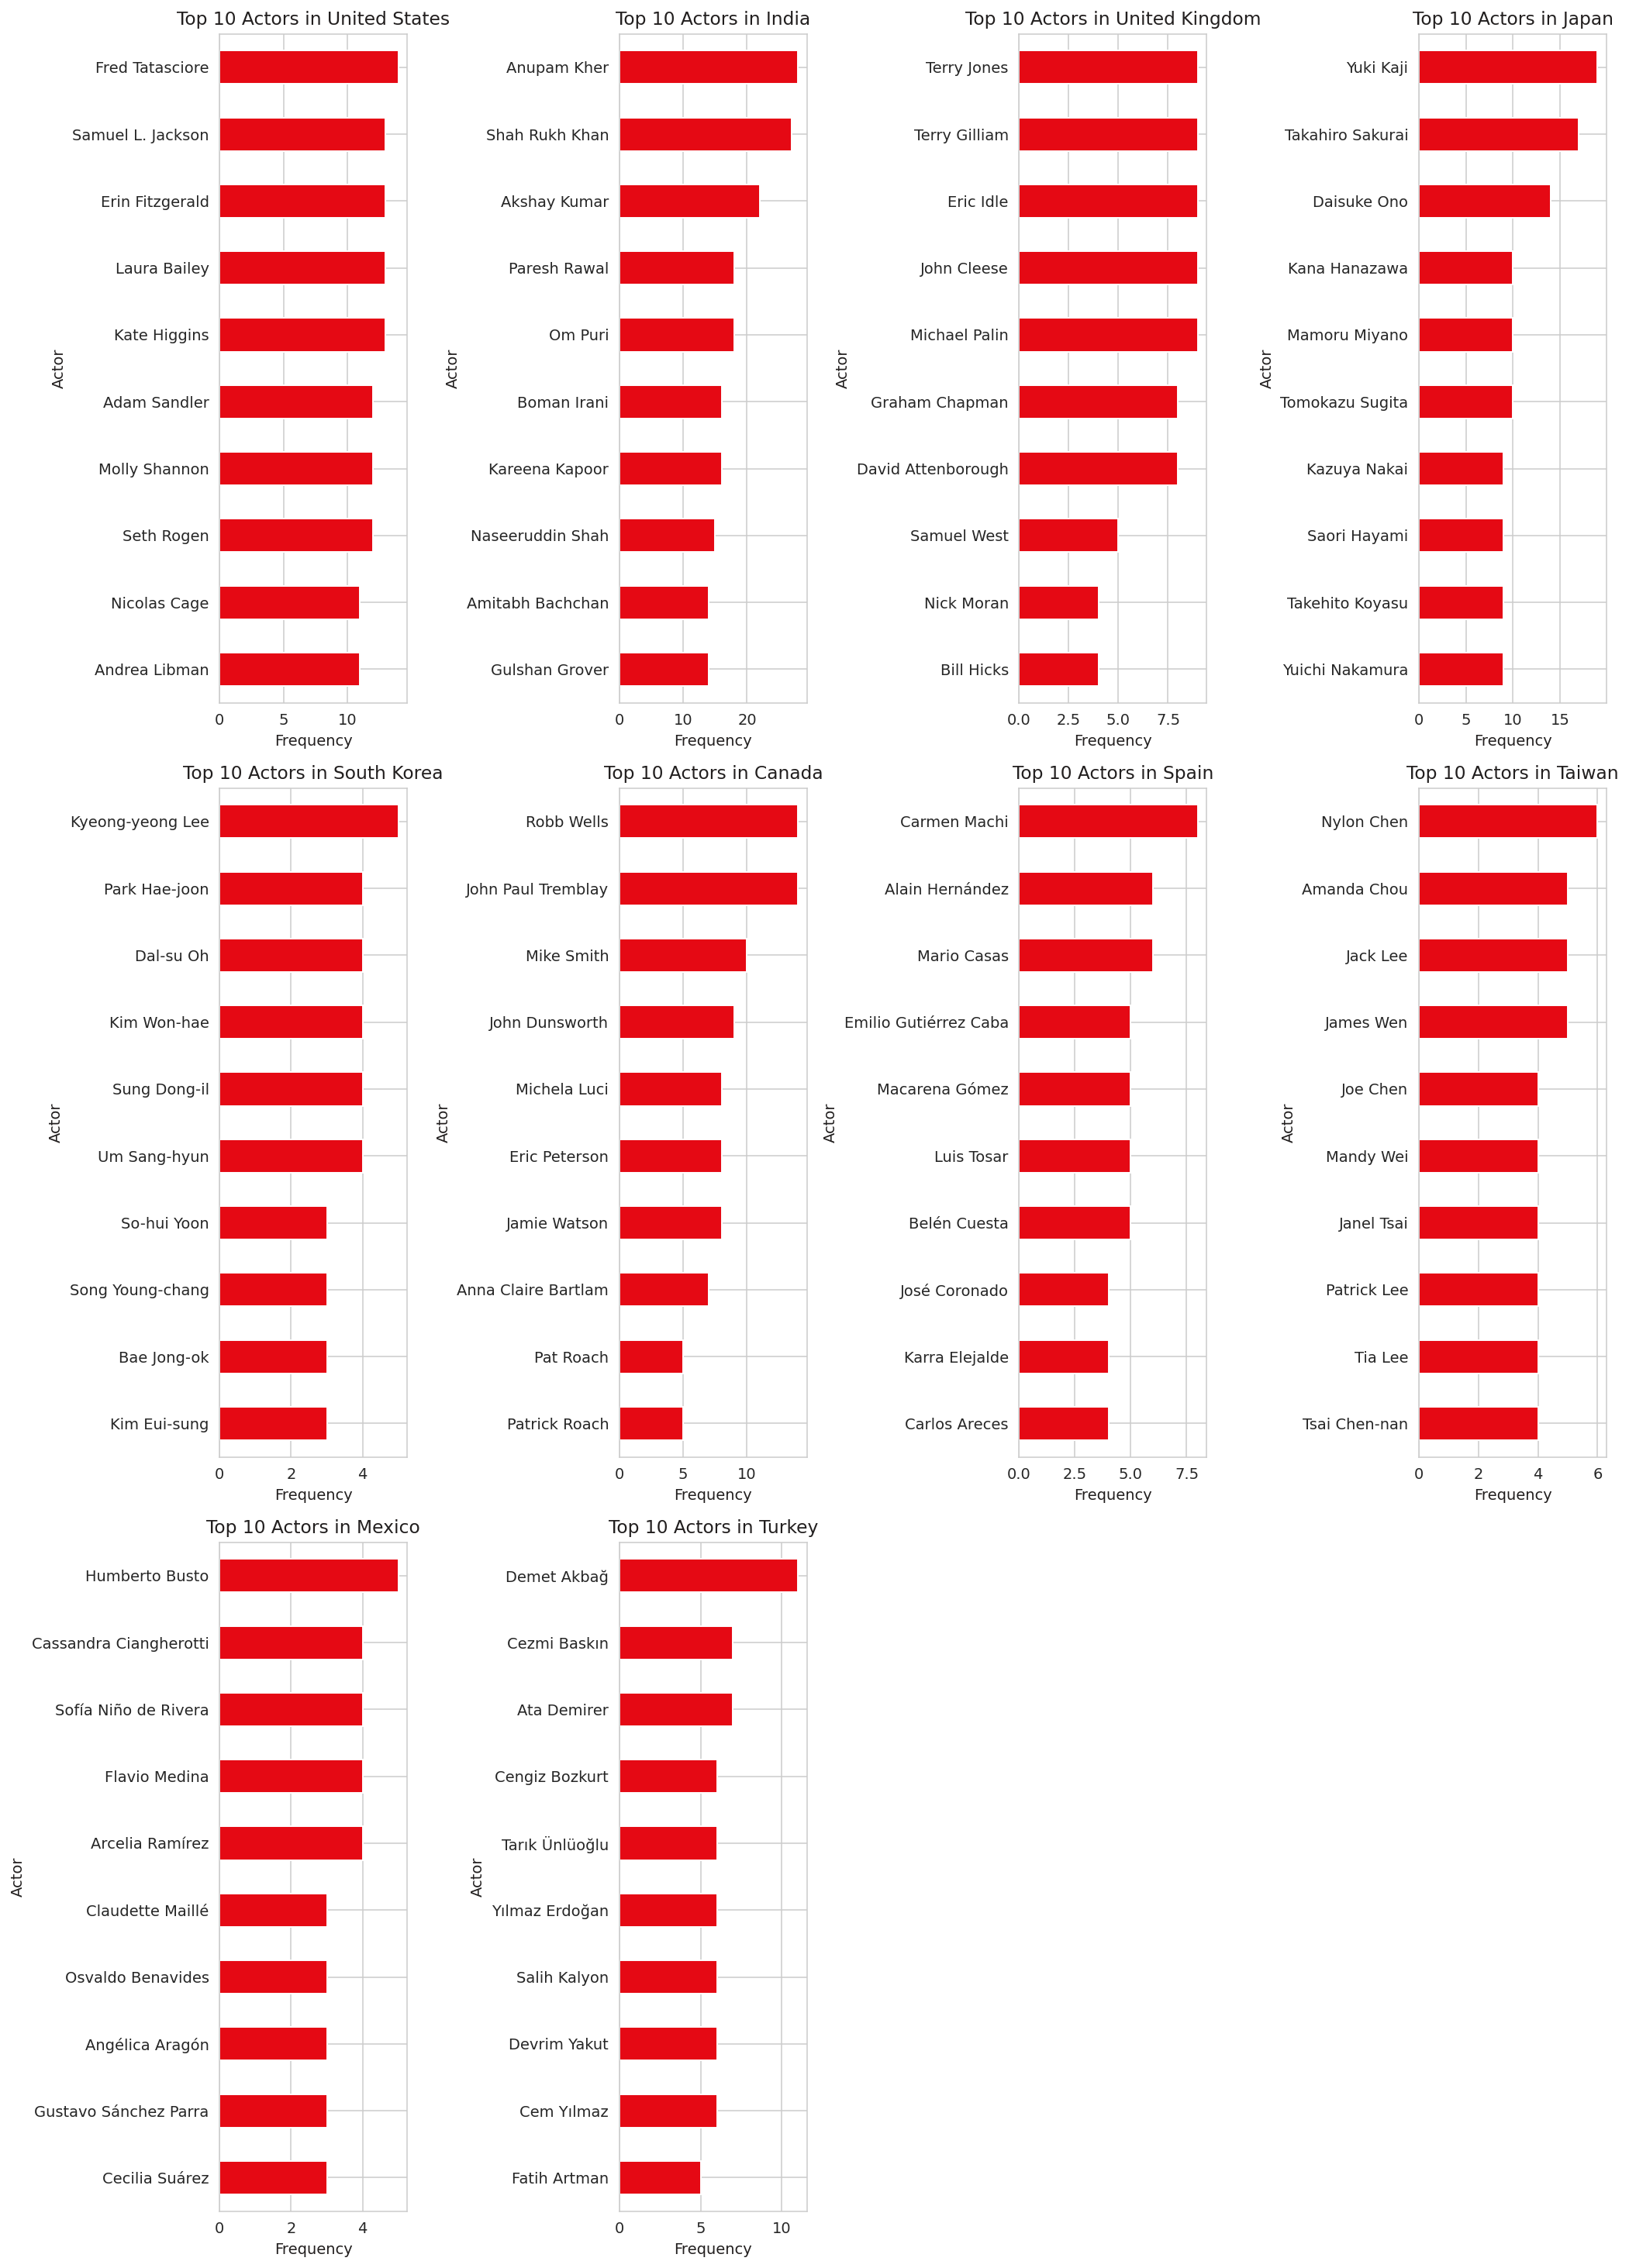

In [873]:
# Generate a set of subplots, each showing the top 10 actors by frequency for one of the top 10 countries with the most entries in the dataset. 
# Identify popular actors within different countries' Netflix content.

filtered_df = df[df['country'] != 'Unknown']
filtered_df = filtered_df[filtered_df['cast'] != 'Unknown']

country_actor_counts = filtered_df.groupby('country')['cast'].apply(lambda x: pd.Series(x.str.split(', ').explode().value_counts()))

top_countries = filtered_df['country'].value_counts().head(10).index

num_plots = len(top_countries)
num_cols = 4
num_rows = (num_plots + num_cols - 1) // num_cols

fig, axs = plt.subplots(num_rows, num_cols, figsize=(15, 7*num_rows))

for i, country in enumerate(top_countries):
    ax = axs[i // num_cols, i % num_cols]  
    top_actors = country_actor_counts.loc[country].nlargest(10)  
    top_actors = top_actors.iloc[::-1]  
    top_actors.plot(kind='barh', color='#e50914', ax=ax)  
    ax.set_title(f'Top 10 Actors in {country}', color='#221f1f')
    ax.set_xlabel('Frequency', color='#221f1f')  
    ax.set_ylabel('Actor', color='#221f1f')  
    ax.tick_params(axis='y', rotation=0)  

for i in range(num_plots, num_rows * num_cols):
    axs.flatten()[i].axis('off')

plt.tight_layout()
plt.show()

**9. 10 actors with the most movies and Tv shows**

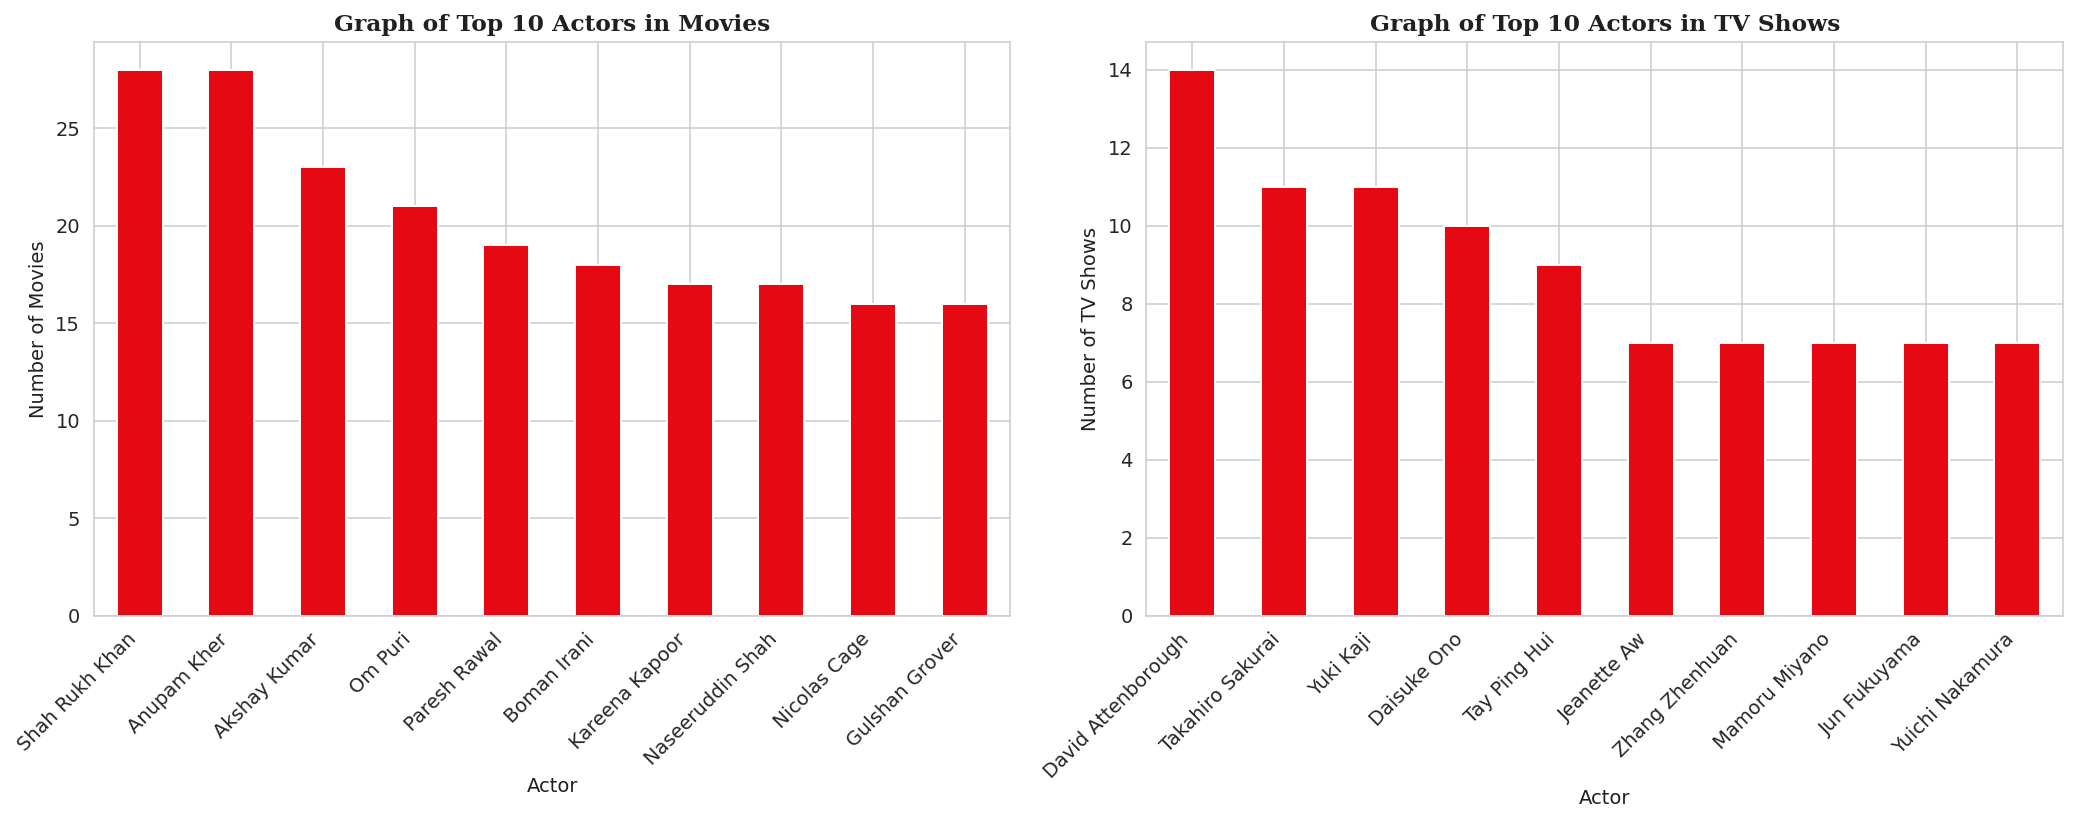

In [874]:
# Compare the top actors appearing in movies and TV shows separately, providing insights into the popularity of different actors across different types of content on Netflix.

df = df[df['cast'] != 'Unknown']

movies = df[df['type'] == 'Movie']
tv_shows = df[df['type'] == 'TV Show']

movie_actor_counts = movies['cast'].str.split(', ').explode().value_counts()
tv_show_actor_counts = tv_shows['cast'].str.split(', ').explode().value_counts()

top_10_movie_actors = movie_actor_counts.head(10)
top_10_tv_show_actors = tv_show_actor_counts.head(10)


plt.figure(figsize=(15, 6))


plt.subplot(1, 2, 1)
top_10_movie_actors.plot(kind='bar', color='#e50914')
plt.xlabel('Actor', color='#221f1f')
plt.ylabel('Number of Movies', color='#221f1f')
plt.xticks(rotation=45, ha='right')
plt.grid(True, color='#CCCCCC')

plt.text(0.5, 1.05, 'Graph of Top 10 Actors in Movies', fontsize=12, fontweight='bold', fontfamily='serif', ha='center', va='top',color='#221f1f', transform=plt.gca().transAxes)


plt.subplot(1, 2, 2)
top_10_tv_show_actors.plot(kind='bar', color='#e50914')
plt.xlabel('Actor', color='#221f1f')
plt.ylabel('Number of TV Shows', color='#221f1f')
plt.xticks(rotation=45, ha='right')
plt.grid(True, color='#CCCCCC')

plt.text(0.5, 1.05, 'Graph of Top 10 Actors in TV Shows', fontsize=12, fontweight='bold', fontfamily='serif', ha='center', va='top',color='#221f1f', transform=plt.gca().transAxes)

plt.tight_layout()
plt.show()

**10. 10 Directors with the most movies and Tv shows**

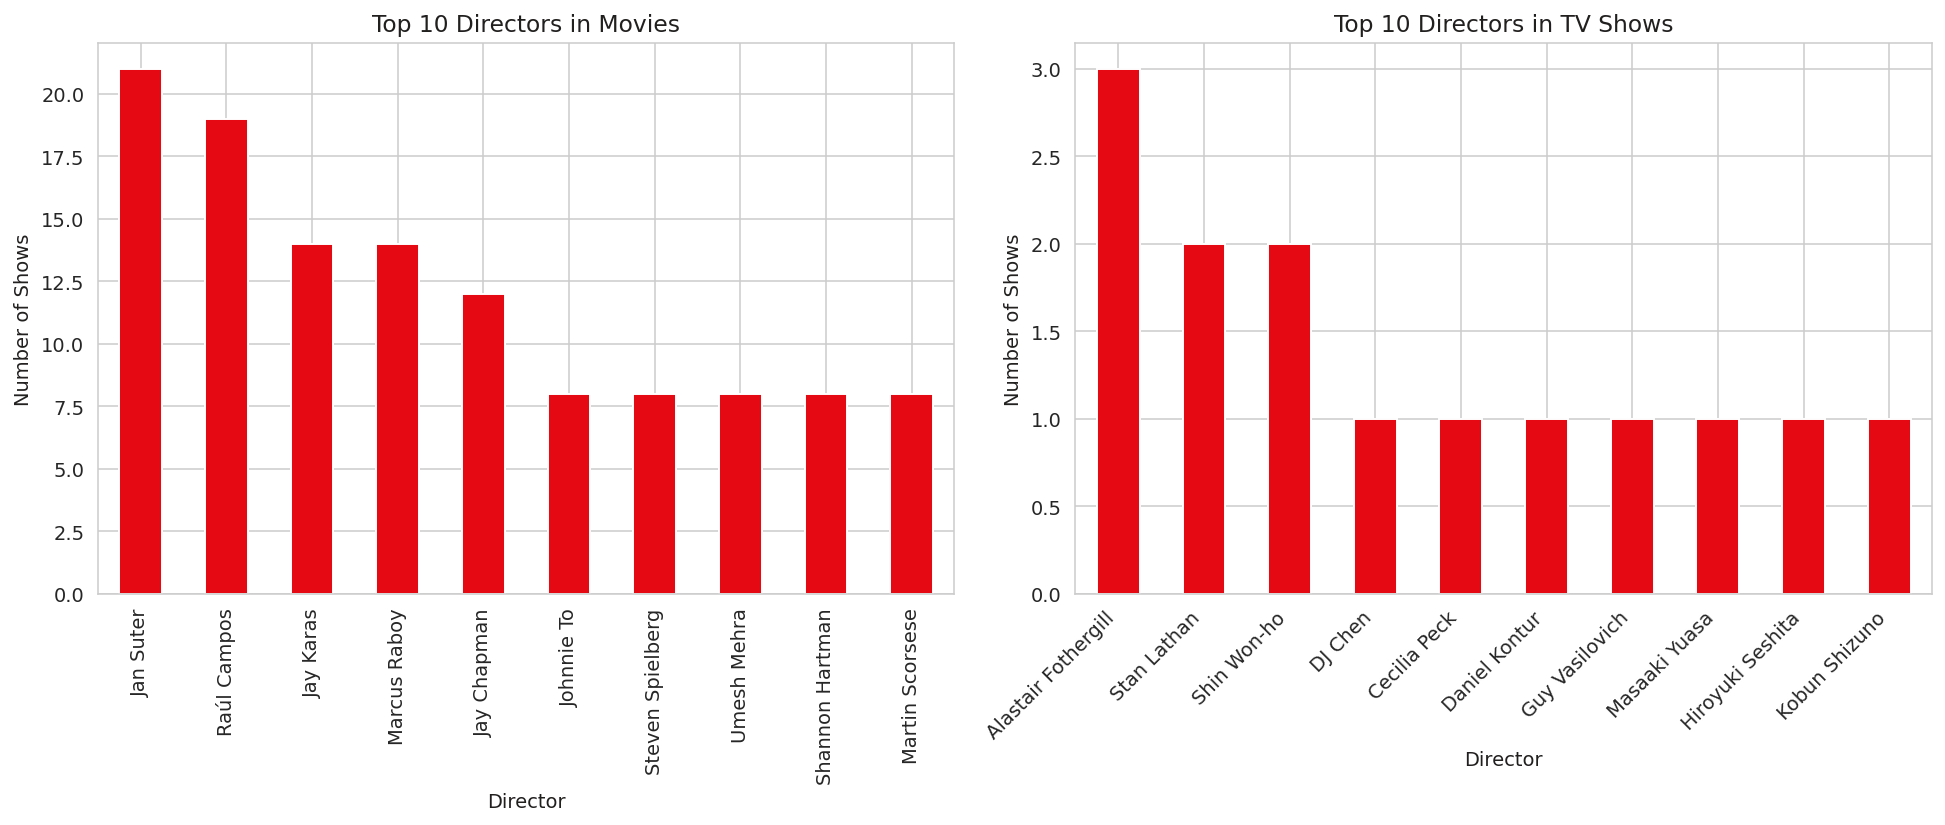

In [875]:
# Compare the top directors of movies and TV shows separately, providing insights into which directors have contributed the most content to Netflix in each category.

df_filtered = df[df['director'] != 'Unknown']

def get_top_directors(data):
    
    all_directors = [director for directors in data['director'].str.split(', ') if isinstance(directors, list) for director in directors]
    
    director_counts = pd.Series(all_directors).value_counts()

    top_10_directors = director_counts.head(10)
    return top_10_directors

top_directors_movies = get_top_directors(df_filtered[df_filtered['type'] == 'Movie'])

top_directors_tv_shows = get_top_directors(df_filtered[df_filtered['type'] == 'TV Show'])


fig, axs = plt.subplots(1, 2, figsize=(14, 6))


top_directors_movies.plot(kind='bar', ax=axs[0], color='#e50914')
axs[0].set_title('Top 10 Directors in Movies', color='#221f1f')
axs[0].set_ylabel('Number of Shows', color='#221f1f')
axs[0].set_xlabel('Director', color='#221f1f')
plt.xticks(rotation=45, ha='right')
plt.grid(True, color='#CCCCCC')


top_directors_tv_shows.plot(kind='bar', ax=axs[1], color='#e50914')
axs[1].set_title('Top 10 Directors in TV Shows', color='#221f1f')
axs[1].set_ylabel('Number of Shows', color='#221f1f')
axs[1].set_xlabel('Director', color='#221f1f')
plt.xticks(rotation=45, ha='right')
plt.grid(True, color='#CCCCCC')

plt.tight_layout()
plt.show()